<a href="https://colab.research.google.com/github/AliMadany/AirBnb-Price-Predication-/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.&nbsp;Import libraries


In [ ]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 0.1&nbsp;Import dataSets


In [ ]:
df = pd.read_csv('/content/Dataset/amsterdam_weekdays.csv')
df

Unnamed: 0      realSum        room_type  room_shared  room_private  \
0              0   194.033698     Private room        False          True   
1              1   344.245776     Private room        False          True   
2              2   264.101422     Private room        False          True   
3              3   433.529398     Private room        False          True   
4              4   485.552926     Private room        False          True   
...          ...          ...              ...          ...           ...   
1098        1098  2486.115342  Entire home/apt        False         False   
1099        1099   233.637194     Private room        False          True   
1100        1100   317.062311     Private room        False          True   
1101        1101  1812.855904  Entire home/apt        False         False   
1102        1102   258.008577      Shared room         True         False   

      person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                 2.0              False      1    0                10.0   
1                 4.0              False      0    0                 8.0   
2                 2.0              False      0    1                 9.0   
3                 4.0              False      0    1                 9.0   
4                 2.0               True      0    0                10.0   
...               ...                ...    ...  ...                 ...   
1098              2.0              False      0    0                10.0   
1099              2.0              False      1    0                10.0   
1100              2.0              False      1    0                10.0   
1101              4.0              False      0    0                 8.0   
1102              2.0              False      0    0                 8.0   

      guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                           93.0         1  5.022964    2.539380   78.690379   
1                           85.0         1  0.488389    0.239404  631.176378   
2                           87.0         1  5.748312    3.651621   75.275877   
3                           90.0         2  0.384862    0.439876  493.272534   
4                           98.0         1  0.544738    0.318693  552.830324   
...                          ...       ...       ...         ...         ...   
1098                       100.0         1  2.375833    1.436054  181.198355   
1099                        90.0         1  4.719736    0.322263  108.024880   
1100                        92.0         1  0.598355    0.751993  440.476515   
1101                        84.0         5  1.943020    0.388532  257.948105   
1102                        90.0         1  0.280204    0.516217  533.962653   

      attr_index_norm  rest_index  rest_index_norm      lng       lat  
0            4.166708   98.253896         6.846473  4.90569  52.41772  
1           33.421209  837.280757        58.342928  4.90005  52.37432  
2            3.985908   95.386955         6.646700  4.97512  52.36103  
3           26.119108  875.033098        60.973565  4.89417  52.37663  
4           29.272733  815.305740        56.811677  4.90051  52.37508  
...               ...         ...              ...      ...       ...  
1098         9.594573  225.304203        15.699521  4.85869  52.37677  
1099         5.719989  134.775277         9.391335  4.83611  52.34910  
1100        23.323524  625.947562        43.616927  4.88897  52.37798  
1101        13.658524  336.589237        23.454022  4.90688  52.35794  
1102        28.273677  807.492307        56.267226  4.89295  52.37575  

[1103 rows x 20 columns]

# 1.&nbsp; Combine DataSets


In [ ]:
folder_path = '/content/Dataset'  # Update to your folder path


In [ ]:
# Initialize an empty list to store DataFrames
dataframes = []

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):  # Ensure it's a CSV file
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)

        # Add extra columns for organization
        df['Country'] = filename.split('_')[0]  # Extract country name from filename
        df['Day_Type'] = 'Weekday' if 'weekday' in filename.lower() else 'Weekend'

        # Append the DataFrame to the list
        dataframes.append(df)

# Combine all DataFrames into one
df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows
df.head(10)


Unnamed: 0     realSum        room_type  room_shared  room_private  \
0           0  536.396682  Entire home/apt        False         False   
1           1  290.101594     Private room        False          True   
2           2  445.754497  Entire home/apt        False         False   
3           3  211.343089     Private room        False          True   
4           4  266.334234  Entire home/apt        False         False   
5           5  345.092739  Entire home/apt        False         False   
6           6  387.035138  Entire home/apt        False         False   
7           7  247.926181  Entire home/apt        False         False   
8           8  527.076149  Entire home/apt        False         False   
9           9  193.634076     Private room        False          True   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  ...  \
0              5.0              False      0    1                 9.0  ...   
1              2.0               True      0    0                10.0  ...   
2              4.0              False      0    1                10.0  ...   
3              2.0              False      0    0                10.0  ...   
4              2.0               True      0    0                 9.0  ...   
5              2.0              False      0    1                 9.0  ...   
6              2.0               True      0    1                10.0  ...   
7              4.0              False      0    0                 7.0  ...   
8              4.0               True      0    0                10.0  ...   
9              2.0              False      0    0                10.0  ...   

       dist  metro_dist   attr_index  attr_index_norm   rest_index  \
0  1.351201    0.212346   390.776775        19.001549  1030.738507   
1  0.699821    0.193710   518.478270        25.211044  1218.658866   
2  0.968982    0.294343   432.689942        21.039580  1069.894793   
3  3.302319    0.234740   444.555284        21.616533   902.856370   
4  1.402430    0.055052  1013.458689        49.279502  1348.063511   
5  0.547571    0.196006   542.139354        26.361565  1199.179620   
6  0.882417    0.154328   753.363260        36.632343  1422.220073   
7  1.197920    0.103605   406.932227        19.787109  1070.769545   
8  1.543203    0.549118   967.487229        47.044137  1095.870020   
9  3.998175    0.415837   422.895540        20.563326   803.433744   

   rest_index_norm      lng       lat  Country  Day_Type  
0        47.550371  2.35900  48.86800    paris   Weekend  
1        56.219575  2.35385  48.86282    paris   Weekend  
2        49.356741  2.36023  48.86375    paris   Weekend  
3        41.650870  2.31714  48.87475    paris   Weekend  
4        62.189313  2.33408  48.85384    paris   Weekend  
5        55.320952  2.35600  48.86100    paris   Weekend  
6        65.610328  2.34200  48.85300    paris   Weekend  
7        49.397096  2.35915  48.86648    paris   Weekend  
8        50.555039  2.33201  48.85891    paris   Weekend  
9        37.064272  2.30670  48.87582    paris   Weekend  

[10 rows x 22 columns]

# 2 .&nbsp; Data Exploration and visualization

## 2.1&nbsp;Exploration

In [ ]:
df.tail(10)

Unnamed: 0     realSum        room_type  room_shared  room_private  \
51697        3120  290.800634  Entire home/apt        False         False   
51698        3121  277.984901  Entire home/apt        False         False   
51699        3122  463.696523  Entire home/apt        False         False   
51700        3123  336.005219  Entire home/apt        False         False   
51701        3124  223.692795  Entire home/apt        False         False   
51702        3125  231.615248  Entire home/apt        False         False   
51703        3126  223.692795  Entire home/apt        False         False   
51704        3127  567.853481  Entire home/apt        False         False   
51705        3128  200.391462  Entire home/apt        False         False   
51706        3129  301.286234  Entire home/apt        False         False   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
51697              4.0              False      0    0                 9.0   
51698              2.0              False      1    0                 9.0   
51699              4.0               True      1    0                10.0   
51700              2.0               True      1    0                10.0   
51701              4.0              False      0    0                10.0   
51702              4.0              False      0    0                10.0   
51703              2.0              False      1    0                 9.0   
51704              6.0               True      0    0                10.0   
51705              2.0               True      0    0                 9.0   
51706              2.0              False      0    0                10.0   

       ...      dist  metro_dist  attr_index  attr_index_norm  rest_index  \
51697  ...  3.660390    0.168152  209.752294        10.210671  540.339247   
51698  ...  2.789666    0.116311  225.643600        10.984254  568.056473   
51699  ...  3.876573    0.189838  204.783263         9.968780  498.546709   
51700  ...  3.878910    0.200138  205.065483         9.982519  499.915747   
51701  ...  4.087203    0.212189  232.373133        11.311846  518.196744   
51702  ...  3.558773    0.154750  185.488125         9.029499  474.358260   
51703  ...  4.205210    0.253034  172.658783         8.404971  406.585538   
51704  ...  4.312136    0.304642  178.222781         8.675825  420.726229   
51705  ...  2.891206    0.240686  235.168523        11.447924  602.451547   
51706  ...  3.469721    0.508493  200.639467         9.767062  478.992836   

       rest_index_norm      lng       lat  Country  Day_Type  
51697        31.750084  2.38051  48.88393    paris   Weekday  
51698        33.378735  2.39077  48.85701    paris   Weekday  
51699        29.294374  2.37943  48.88667    paris   Weekday  
51700        29.374818  2.37918  48.88679    paris   Weekday  
51701        30.449001  2.36001  48.89302    paris   Weekday  
51702        27.873072  2.40050  48.85093    paris   Weekday  
51703        23.890778  2.40100  48.87700    paris   Weekday  
51704        24.721678  2.39334  48.88463    paris   Weekday  
51705        35.399774  2.38200  48.87400    paris   Weekday  
51706        28.145397  2.39992  48.85886    paris   Weekday  

[10 rows x 22 columns]

In [ ]:
df.sample(5)

Unnamed: 0      realSum        room_type  room_shared  room_private  \
48685         108  1170.192935     Private room        False          True   
42382         188   164.506831  Entire home/apt        False         False   
45647         800   454.854358     Private room        False          True   
39011         629   144.917374  Entire home/apt        False         False   
18218         849   254.614006     Private room        False          True   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
48685              2.0              False      0    0                 6.0   
42382              6.0              False      1    0                10.0   
45647              2.0               True      1    0                10.0   
39011              2.0              False      0    0                 8.0   
18218              2.0              False      1    0                10.0   

       ...      dist  metro_dist  attr_index  attr_index_norm   rest_index  \
48685  ...  1.714140    0.070038  671.331596        32.680196  1373.561977   
42382  ...  1.715006    0.952607   89.124695         3.360371   130.442734   
45647  ...  2.383457    1.403693  195.468989        10.350213   231.580644   
39011  ...  4.297498    1.494181   65.852705         4.716089    91.692447   
18218  ...  1.922394    0.457038  352.712084        13.618621   702.340917   

       rest_index_norm       lng       lat    Country  Day_Type  
48685        80.709866   2.33482  48.86646      paris   Weekday  
42382         9.794434  23.74086  37.99039     athens   Weekday  
45647        16.136872   4.92645  52.36673  amsterdam   Weekday  
39011         2.191974  16.32025  48.22337     vienna   Weekday  
18218        15.428070   2.16217  41.37086  barcelona   Weekend  

[5 rows x 22 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  float64
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  float64
 10  guest_satisfaction_overall  51707 non-null  float64
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  517

In [ ]:
df.dtypes

Unnamed: 0                      int64
realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
Country                        object
Day_Type                       object
dtype: object

In [ ]:
df.describe()

Unnamed: 0       realSum  person_capacity         multi  \
count  51707.000000  51707.000000     51707.000000  51707.000000   
mean    1620.502388    279.879591         3.161661      0.291353   
std     1217.380366    327.948386         1.298545      0.454390   
min        0.000000     34.779339         2.000000      0.000000   
25%      646.000000    148.752174         2.000000      0.000000   
50%     1334.000000    211.343089         3.000000      0.000000   
75%     2382.000000    319.694287         4.000000      1.000000   
max     5378.000000  18545.450285         6.000000      1.000000   

                biz  cleanliness_rating  guest_satisfaction_overall  \
count  51707.000000        51707.000000                51707.000000   
mean       0.350204            9.390624                   92.628232   
std        0.477038            0.954868                    8.945531   
min        0.000000            2.000000                   20.000000   
25%        0.000000            9.000000                   90.000000   
50%        0.000000           10.000000                   95.000000   
75%        1.000000           10.000000                   99.000000   
max        1.000000           10.000000                  100.000000   

          bedrooms          dist    metro_dist    attr_index  attr_index_norm  \
count  51707.00000  51707.000000  51707.000000  51707.000000     51707.000000   
mean       1.15876      3.191285      0.681540    294.204105        13.423792   
std        0.62741      2.393803      0.858023    224.754123         9.807985   
min        0.00000      0.015045      0.002301     15.152201         0.926301   
25%        1.00000      1.453142      0.248480    136.797385         6.380926   
50%        1.00000      2.613538      0.413269    234.331748        11.468305   
75%        1.00000      4.263077      0.737840    385.756381        17.415082   
max       10.00000     25.284557     14.273577   4513.563486       100.000000   

         rest_index  rest_index_norm           lng           lat  
count  51707.000000     51707.000000  51707.000000  51707.000000  
mean     626.856696        22.786177      7.426068     45.671128  
std      497.920226        17.804096      9.799725      5.249263  
min       19.576924         0.592757     -9.226340     37.953000  
25%      250.854114         8.751480     -0.072500     41.399510  
50%      522.052783        17.542238      4.873000     47.506690  
75%      832.628988        32.964603     13.518825     51.471885  
max     6696.156772       100.000000     23.786020     52.641410

In [ ]:
df['room_type'].value_counts()

room_type
Entire home/apt    32648
Private room       18693
Shared room          366
Name: count, dtype: int64

## 2.2&nbsp; Visualization

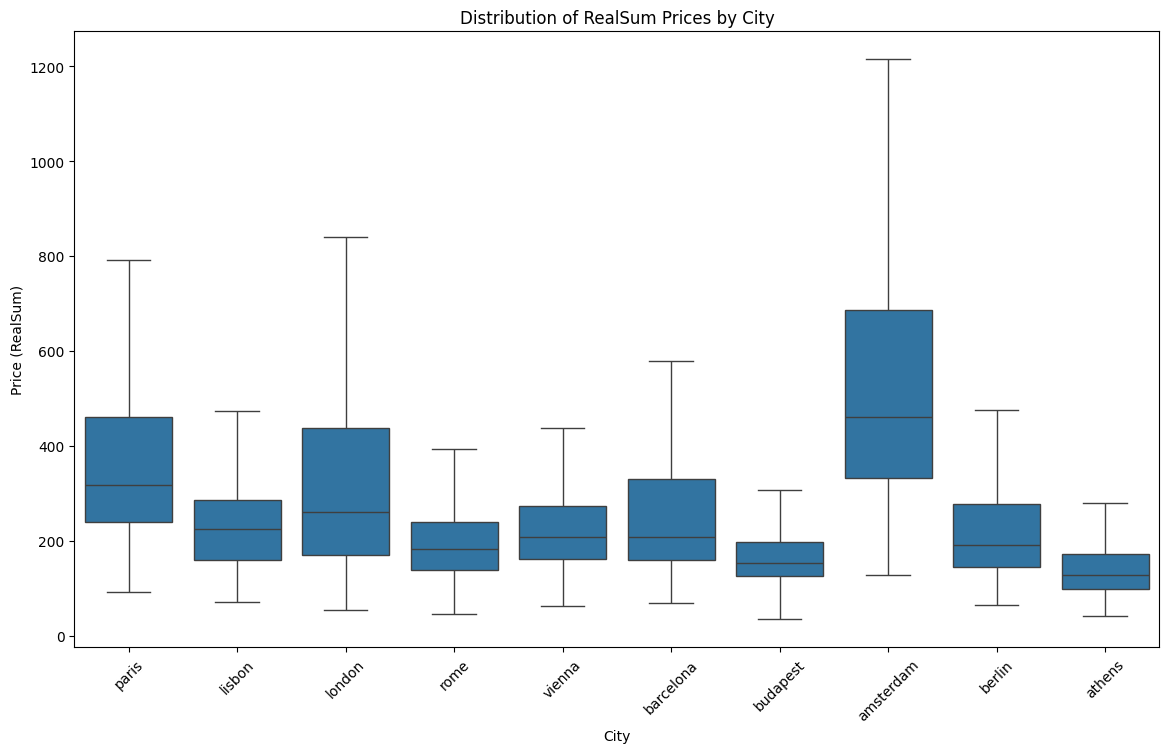

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of `realSum` by city
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Country', y='realSum', showfliers=False)  # Hides outliers for clarity
plt.title('Distribution of RealSum Prices by City')
plt.xlabel('City')
plt.ylabel('Price (RealSum)')
plt.xticks(rotation=45)  # Rotate city names for better readability
plt.show()


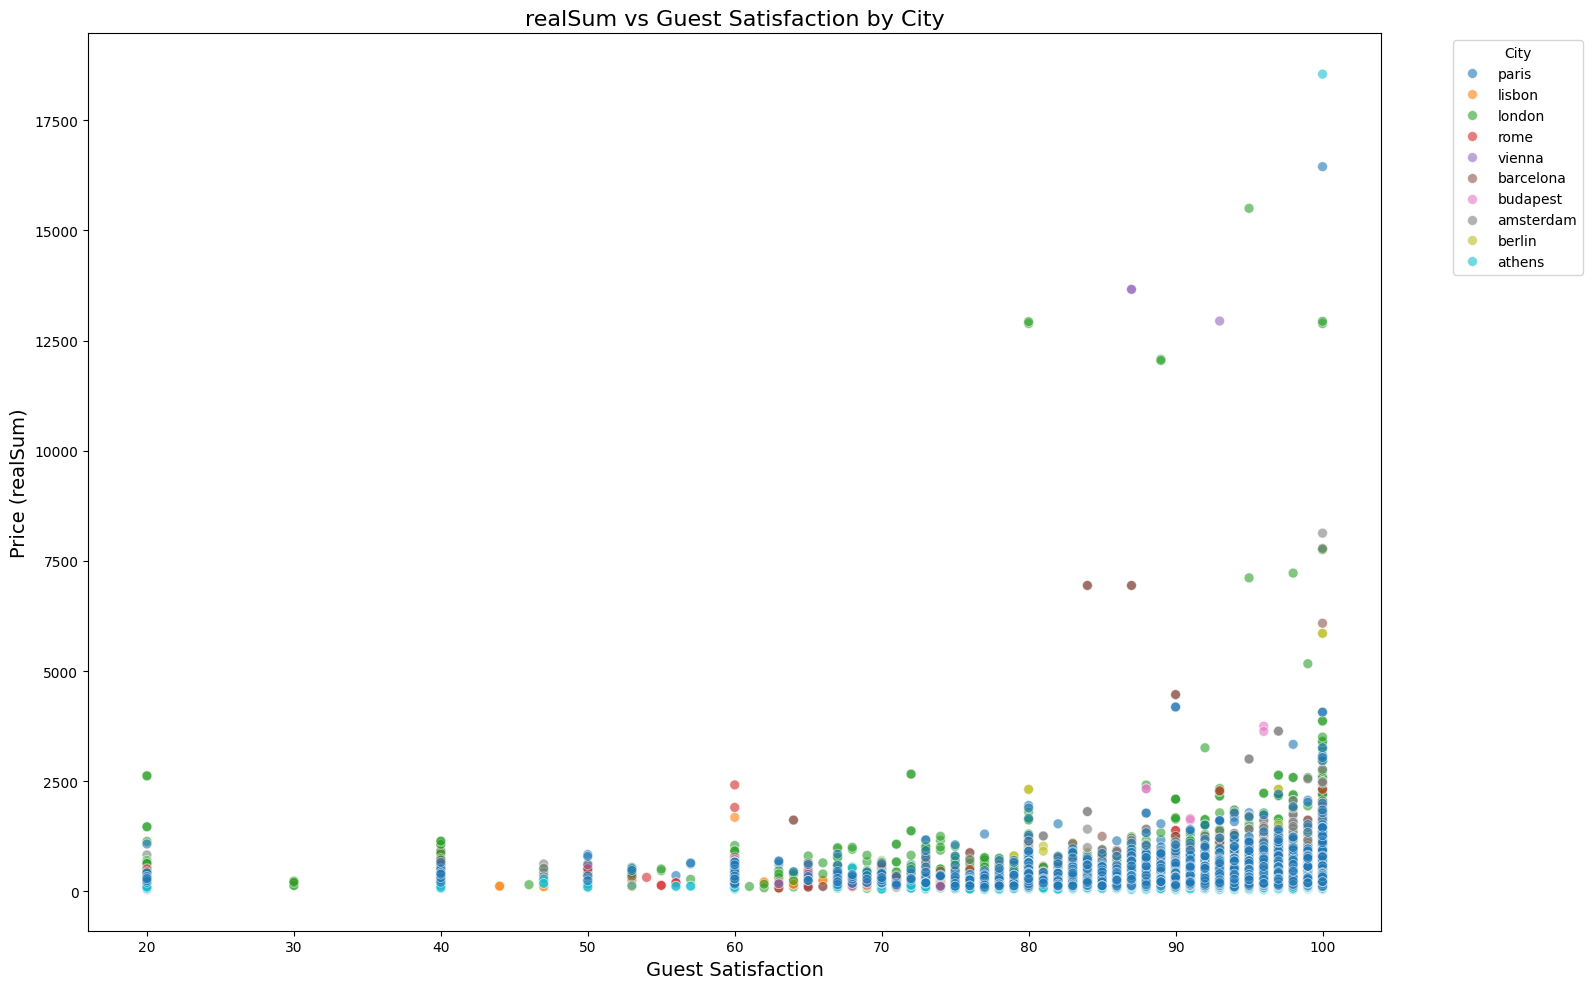

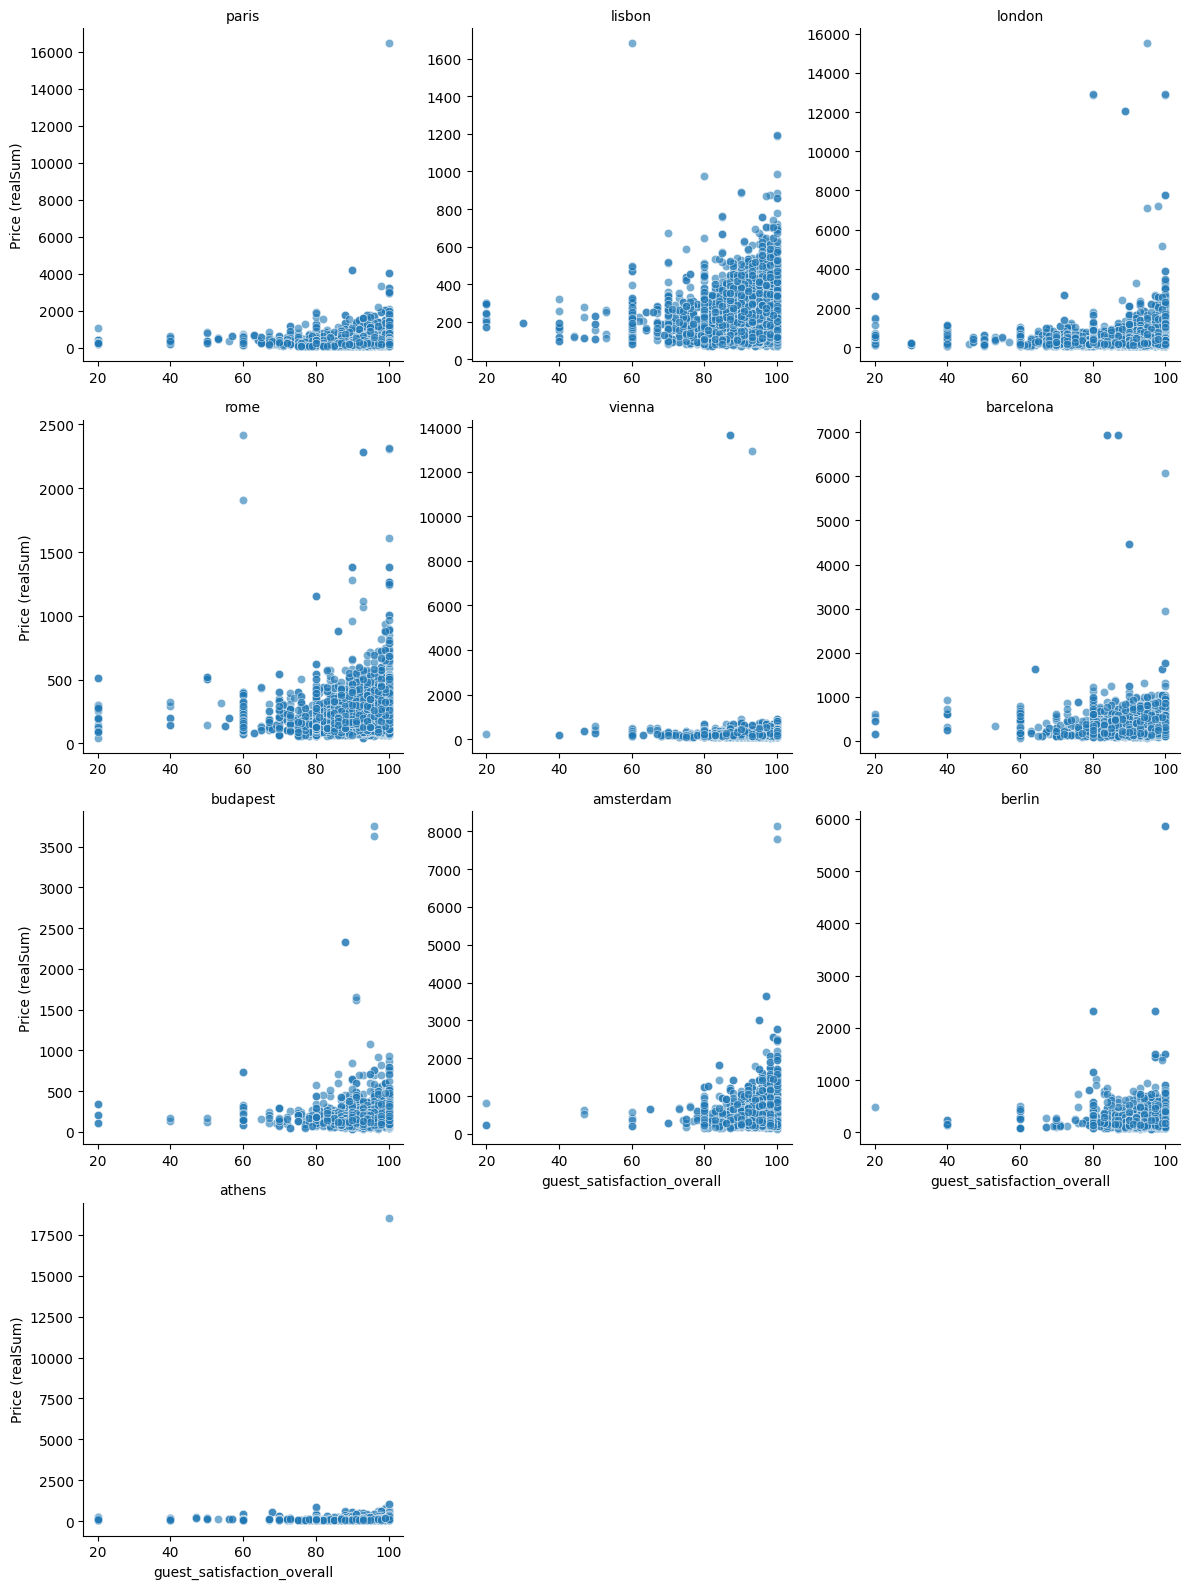

In [ ]:
    # Scatter Plot with Adjustments
    plt.figure(figsize=(16, 10))  # Increased figure size
    sns.scatterplot(
        data=df,
        x='guest_satisfaction_overall',
        y='realSum',
        hue='Country',
        alpha=0.6,  # Increase transparency for less overlap
        s=50  # Adjust marker size
    )
    plt.title('realSum vs Guest Satisfaction by City', fontsize=16)
    plt.xlabel('Guest Satisfaction', fontsize=14)
    plt.ylabel('Price (realSum)', fontsize=14)
    plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Optional: Facet Grid for Each City
    g = sns.FacetGrid(df, col="Country", col_wrap=3, height=4, sharex=False, sharey=False)
    g.map_dataframe(sns.scatterplot, x="guest_satisfaction_overall", y="realSum", alpha=0.6)
    g.set_axis_labels("guest_satisfaction_overall", "Price (realSum)")
    g.set_titles(col_template="{col_name}")
    g.tight_layout()
    plt.show()



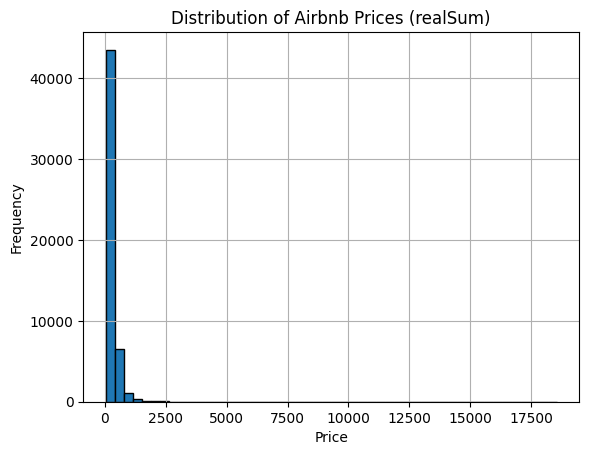

In [ ]:
df['realSum'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Airbnb Prices (realSum)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



* Skewed Distribution:

The majority of prices are concentrated on the left side of the graph (lower prices), with a long tail stretching toward higher prices. This indicates that the data is highly right-skewed, which is common for pricing data.
*   Outliers

There are extremely high prices (e.g., greater than $2500 and up to  17500) that significantly extend the range, making the majority of data points appear compressed.


*   Frequency:

Most listings have prices below $500, as seen from the high bar density on the left side of the chart.






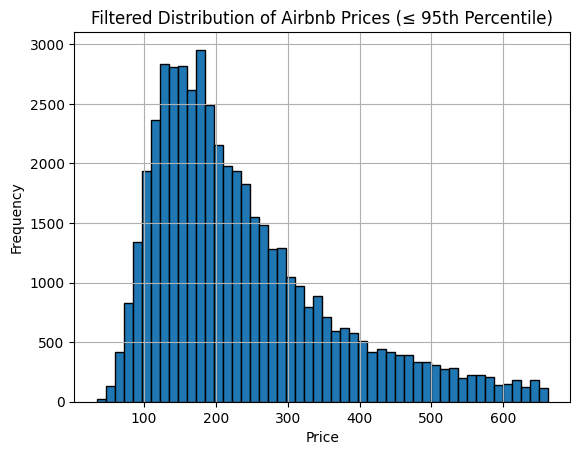

In [ ]:
import matplotlib.pyplot as plt

# Assuming `df` is your dataset
threshold = df['realSum'].quantile(0.95)  # 95th percentile
filtered_data = df[df['realSum'] <= threshold]

# Plot the histogram
filtered_data['realSum'].hist(bins=50, edgecolor='black')
plt.title('Filtered Distribution of Airbnb Prices (≤ 95th Percentile)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


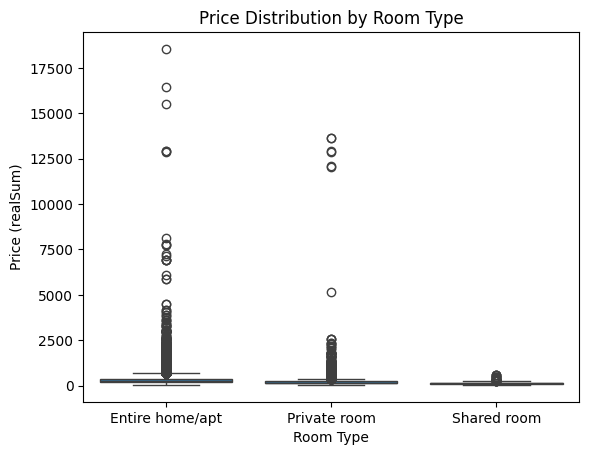

In [ ]:
import seaborn as sns

sns.boxplot(x='room_type', y='realSum', data=df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price (realSum)')
plt.show()


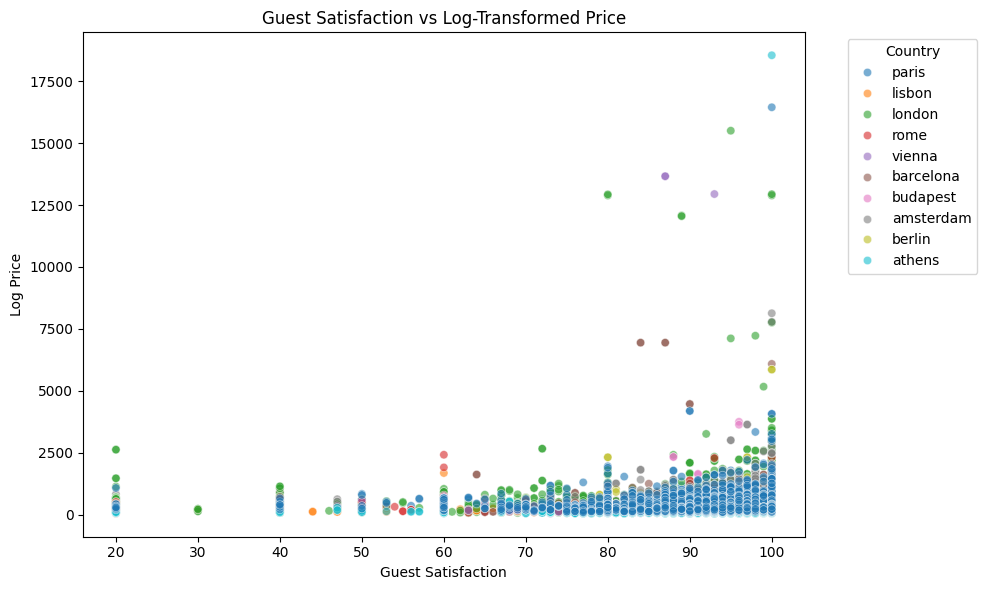

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='guest_satisfaction_overall',
    y='realSum',
    hue='Country',
    alpha=0.6
)
plt.title('Guest Satisfaction vs Log-Transformed Price')
plt.xlabel('Guest Satisfaction')
plt.ylabel('Log Price')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


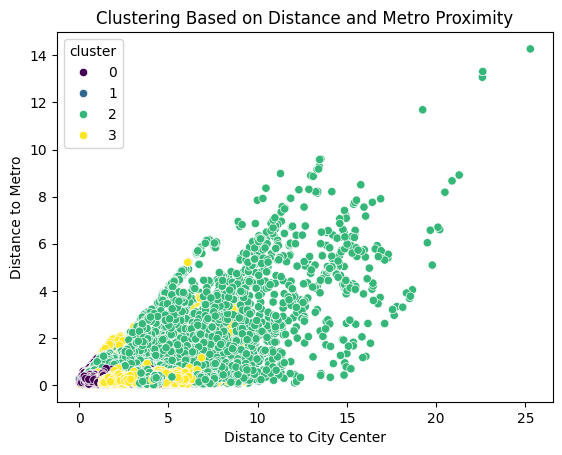

            realSum  guest_satisfaction_overall  cleanliness_rating
cluster                                                            
0        435.338244                   90.991105            9.236102
1        637.855172                   92.205692            9.364812
2        205.261970                   93.290316            9.468605
3        293.627547                   92.498323            9.359736


In [ ]:
from sklearn.cluster import KMeans

# Select clustering features
clustering_features = df[['metro_dist', 'dist', 'attr_index_norm']]
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(clustering_features)

# Scatter plot with clusters
sns.scatterplot(data=df, x='dist', y='metro_dist', hue='cluster', palette='viridis')
plt.title('Clustering Based on Distance and Metro Proximity')
plt.xlabel('Distance to City Center')
plt.ylabel('Distance to Metro')
plt.show()

cluster_summary = df.groupby('cluster')[['realSum', 'guest_satisfaction_overall', 'cleanliness_rating']].mean()
print(cluster_summary)


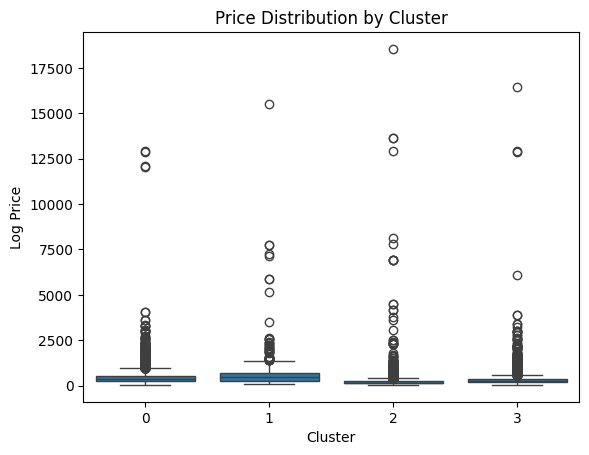

In [ ]:
sns.boxplot(data=df, x='cluster', y='realSum')
plt.title('Price Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Log Price')
plt.show()


In [ ]:
import folium
from folium.plugins import HeatMap

map = folium.Map(location=[50.0, 10.0], zoom_start=4)

# Prepare data for the heatmap, using price as the weight
heat_data = [[row['lat'], row['lng'], row['realSum']] for index, row in df.iterrows()]

# Create and add heatmap layer
HeatMap(
    heat_data,
    gradient={0.2: 'blue', 1: 'blue'},  # Single color for heatmap
    radius=15,  # Adjust radius for heat intensity
    blur=10,    # Adjust blur to spread the heat
    max_zoom=1
).add_to(map)

mapmap = folium.Map(location=[50.0, 10.0], zoom_start=4)

# Prepare data for the heatmap, using price as the weight
heat_data = [[row['lat'], row['lng'], row['realSum']] for index, row in df.iterrows()]

# Create and add heatmap layer
HeatMap(
    heat_data,
    gradient={0.2: 'blue', 1: 'blue'},  # Single color for heatmap
    radius=15,  # Adjust radius for heat intensity
    blur=10,    # Adjust blur to spread the heat
    max_zoom=1
).add_to(map)

map

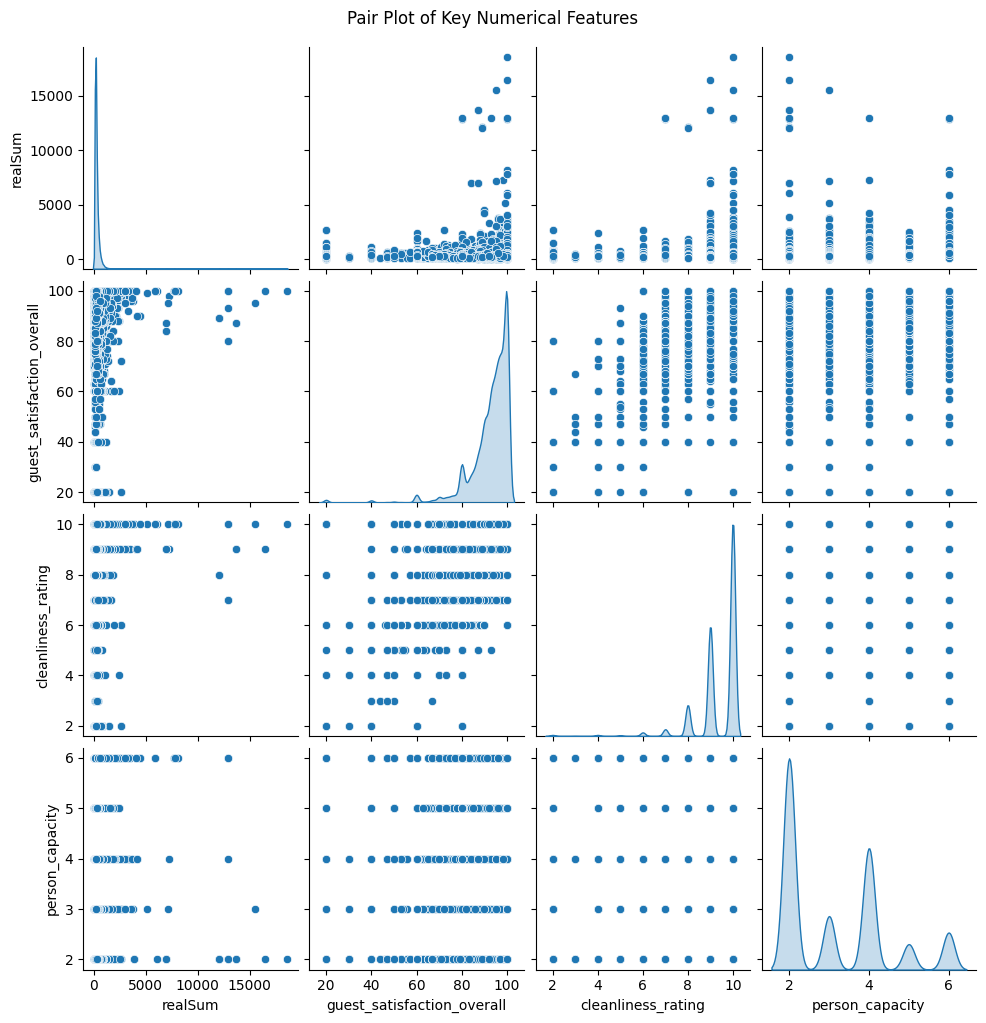

In [ ]:
sns.pairplot(df[['realSum', 'guest_satisfaction_overall', 'cleanliness_rating', 'person_capacity']], diag_kind='kde')
plt.suptitle('Pair Plot of Key Numerical Features', y=1.02)
plt.show()



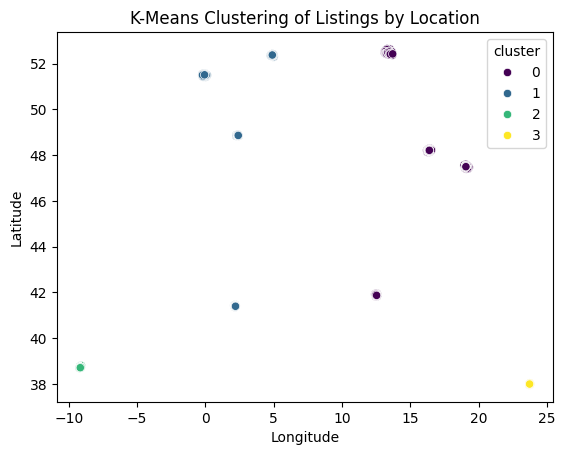

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['lng', 'lat']])

sns.scatterplot(data=df, x='lng', y='lat', hue='cluster', palette='viridis')
plt.title('K-Means Clustering of Listings by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# 4.&nbsp; Data Cleaning


Remeber to remove duplicated

### 4.1.1&nbsp;Null values

No Null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  float64
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  float64
 10  guest_satisfaction_overall  51707 non-null  float64
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  517

### 4.1.2&nbsp; check for Outliers

In [ ]:
df

Unnamed: 0     realSum        room_type  room_shared  room_private  \
0               0  536.396682  Entire home/apt        False         False   
1               1  290.101594     Private room        False          True   
2               2  445.754497  Entire home/apt        False         False   
3               3  211.343089     Private room        False          True   
4               4  266.334234  Entire home/apt        False         False   
...           ...         ...              ...          ...           ...   
51702        3125  231.615248  Entire home/apt        False         False   
51703        3126  223.692795  Entire home/apt        False         False   
51704        3127  567.853481  Entire home/apt        False         False   
51705        3128  200.391462  Entire home/apt        False         False   
51706        3129  301.286234  Entire home/apt        False         False   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                  5.0              False      0    1                 9.0   
1                  2.0               True      0    0                10.0   
2                  4.0              False      0    1                10.0   
3                  2.0              False      0    0                10.0   
4                  2.0               True      0    0                 9.0   
...                ...                ...    ...  ...                 ...   
51702              4.0              False      0    0                10.0   
51703              2.0              False      1    0                 9.0   
51704              6.0               True      0    0                10.0   
51705              2.0               True      0    0                 9.0   
51706              2.0              False      0    0                10.0   

       ...      dist  metro_dist   attr_index  attr_index_norm   rest_index  \
0      ...  1.351201    0.212346   390.776775        19.001549  1030.738507   
1      ...  0.699821    0.193710   518.478270        25.211044  1218.658866   
2      ...  0.968982    0.294343   432.689942        21.039580  1069.894793   
3      ...  3.302319    0.234740   444.555284        21.616533   902.856370   
4      ...  1.402430    0.055052  1013.458689        49.279502  1348.063511   
...    ...       ...         ...          ...              ...          ...   
51702  ...  3.558773    0.154750   185.488125         9.029499   474.358260   
51703  ...  4.205210    0.253034   172.658783         8.404971   406.585538   
51704  ...  4.312136    0.304642   178.222781         8.675825   420.726229   
51705  ...  2.891206    0.240686   235.168523        11.447924   602.451547   
51706  ...  3.469721    0.508493   200.639467         9.767062   478.992836   

       rest_index_norm      lng       lat  Country  Day_Type  
0            47.550371  2.35900  48.86800    paris   Weekend  
1            56.219575  2.35385  48.86282    paris   Weekend  
2            49.356741  2.36023  48.86375    paris   Weekend  
3            41.650870  2.31714  48.87475    paris   Weekend  
4            62.189313  2.33408  48.85384    paris   Weekend  
...                ...      ...       ...      ...       ...  
51702        27.873072  2.40050  48.85093    paris   Weekday  
51703        23.890778  2.40100  48.87700    paris   Weekday  
51704        24.721678  2.39334  48.88463    paris   Weekday  
51705        35.399774  2.38200  48.87400    paris   Weekday  
51706        28.145397  2.39992  48.85886    paris   Weekday  

[51707 rows x 22 columns]

In [ ]:
# Calculate Q1, Q3, and IQR for 'realSum'
Q1 = np.percentile(df['realSum'], 25)
Q3 = np.percentile(df['realSum'], 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in 'realSum'
outliers_count = df[(df['realSum'] < lower_bound) | (df['realSum'] > upper_bound)].shape[0]

# Print the number of outliers found
print(f"Number of outliers in 'realSum': {outliers_count}")

#######################################################

# Calculate Q1, Q3, and IQR for 'person_capacity'
Q1 = np.percentile(df['person_capacity'], 25)
Q3 = np.percentile(df['person_capacity'], 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in 'person_capacity'
outliers_count = df[(df['person_capacity'] < lower_bound) | (df['person_capacity'] > upper_bound)].shape[0]

# Print the number of outliers found
print(f"Number of outliers in 'person_capacity': {outliers_count}")

#######################################################

# Calculate Q1, Q3, and IQR for 'cleanliness_rating'
Q1 = np.percentile(df['cleanliness_rating'], 25)
Q3 = np.percentile(df['cleanliness_rating'], 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in 'cleanliness_rating'
outliers_count = df[(df['cleanliness_rating'] < lower_bound) | (df['cleanliness_rating'] > upper_bound)].shape[0]

# Print the number of outliers found
print(f"Number of outliers in 'cleanliness_rating': {outliers_count}")

#######################################################

# Calculate Q1, Q3, and IQR for 'guest_satisfaction_overall'
Q1 = np.percentile(df['guest_satisfaction_overall'], 25)
Q3 = np.percentile(df['guest_satisfaction_overall'], 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in 'guest_satisfaction_overall'
outliers_count = df[(df['guest_satisfaction_overall'] < lower_bound) | (df['guest_satisfaction_overall'] > upper_bound)].shape[0]

# Print the number of outliers found
print(f"Number of outliers in 'guest_satisfaction_overall': {outliers_count}")

#######################################################

# Calculate Q1, Q3, and IQR for 'bedrooms'
Q1 = np.percentile(df['bedrooms'], 25)
Q3 = np.percentile(df['bedrooms'], 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in 'bedrooms'
outliers_count = df[(df['bedrooms'] < lower_bound) | (df['bedrooms'] > upper_bound)].shape[0]

# Print the number of outliers found
print(f"Number of outliers in 'bedrooms': {outliers_count}")

#######################################################

# Calculate Q1, Q3, and IQR for 'dist'
Q1 = np.percentile(df['dist'], 25)
Q3 = np.percentile(df['dist'], 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in 'dist'
outliers_count = df[(df['dist'] < lower_bound) | (df['dist'] > upper_bound)].shape[0]

# Print the number of outliers found
print(f"Number of outliers in 'dist': {outliers_count}")

#######################################################

# Calculate Q1, Q3, and IQR for 'metro_dist'
Q1 = np.percentile(df['metro_dist'], 25)
Q3 = np.percentile(df['metro_dist'], 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in 'metro_dist'
outliers_count = df[(df['metro_dist'] < lower_bound) | (df['metro_dist'] > upper_bound)].shape[0]

# Print the number of outliers found
print(f"Number of outliers in 'metro_dist': {outliers_count}")

#######################################################

# Calculate Q1, Q3, and IQR for 'attr_index_norm'
Q1 = np.percentile(df['attr_index_norm'], 25)
Q3 = np.percentile(df['attr_index_norm'], 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in 'attr_index_norm'
outliers_count = df[(df['attr_index_norm'] < lower_bound) | (df['attr_index_norm'] > upper_bound)].shape[0]

# Print the number of outliers found
print(f"Number of outliers in 'attr_index_norm': {outliers_count}")

#######################################################

# Calculate Q1, Q3, and IQR for 'rest_index'
Q1 = np.percentile(df['rest_index'], 25)
Q3 = np.percentile(df['rest_index'], 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in 'rest_index'
outliers_count = df[(df['rest_index'] < lower_bound) | (df['rest_index'] > upper_bound)].shape[0]

# Print the number of outliers found
print(f"Number of outliers in 'rest_index': {outliers_count}")

#######################################################

# Calculate Q1, Q3, and IQR for 'rest_index_norm'
Q1 = np.percentile(df['rest_index_norm'], 25)
Q3 = np.percentile(df['rest_index_norm'], 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in 'rest_index_norm'
outliers_count = df[(df['rest_index_norm'] < lower_bound) | (df['rest_index_norm'] > upper_bound)].shape[0]

# Print the number of outliers found
print(f"Number of outliers in 'rest_index_norm': {outliers_count}")

#######################################################

# Calculate total number of outliers across all columns
total_outliers = (
    df[(df['realSum'] < lower_bound) | (df['realSum'] > upper_bound)].shape[0] +
    df[(df['person_capacity'] < lower_bound) | (df['person_capacity'] > upper_bound)].shape[0] +
    df[(df['cleanliness_rating'] < lower_bound) | (df['cleanliness_rating'] > upper_bound)].shape[0] +
    df[(df['guest_satisfaction_overall'] < lower_bound) | (df['guest_satisfaction_overall'] > upper_bound)].shape[0] +
    df[(df['bedrooms'] < lower_bound) | (df['bedrooms'] > upper_bound)].shape[0] +
    df[(df['dist'] < lower_bound) | (df['dist'] > upper_bound)].shape[0] +
    df[(df['metro_dist'] < lower_bound) | (df['metro_dist'] > upper_bound)].shape[0] +
    df[(df['attr_index_norm'] < lower_bound) | (df['attr_index_norm'] > upper_bound)].shape[0] +
    df[(df['rest_index'] < lower_bound) | (df['rest_index'] > upper_bound)].shape[0] +
    df[(df['rest_index_norm'] < lower_bound) | (df['rest_index_norm'] > upper_bound)].shape[0]
)

# Print the total number of outliers
print(f"Total number of outliers: {total_outliers}")


total_data_points = df.shape[0]
print(f"Total number of data points in the dataset: {total_data_points}")

# Check if total outliers are more than 20% of the dataset size
if total_outliers > 0.2 * df.shape[0]:
    print("values excceed 20% of the dataset size")
else:
    print("values are less than 20% of the dataset size")



Number of outliers in 'realSum': 3662
Number of outliers in 'person_capacity': 0
Number of outliers in 'cleanliness_rating': 1830
Number of outliers in 'guest_satisfaction_overall': 2102
Number of outliers in 'bedrooms': 15374
Number of outliers in 'dist': 1746
Number of outliers in 'metro_dist': 5051
Number of outliers in 'attr_index_norm': 1852
Number of outliers in 'rest_index': 2166
Number of outliers in 'rest_index_norm': 998
Total number of outliers: 153650
Total number of data points in the dataset: 51707
values excceed 20% of the dataset size


In [ ]:
# Find the number of duplicates before dropping
duplicates_before = df.duplicated().sum()
print(f"Number of duplicates before dropping: {duplicates_before}")

# Get the duplicate rows that will be dropped
duplicates = df[df.duplicated(keep='first')]

# Print out what was dropped
print("Rows that were dropped:")
print(duplicates)

# Drop duplicates from the DataFrame
df = df.drop_duplicates()



Number of duplicates before dropping: 0
Rows that were dropped:
Empty DataFrame
Columns: [Unnamed: 0, realSum, room_type, room_shared, room_private, person_capacity, host_is_superhost, multi, biz, cleanliness_rating, guest_satisfaction_overall, bedrooms, dist, metro_dist, attr_index, attr_index_norm, rest_index, rest_index_norm, lng, lat, Country, Day_Type]
Index: []

[0 rows x 22 columns]


# Feature Selection

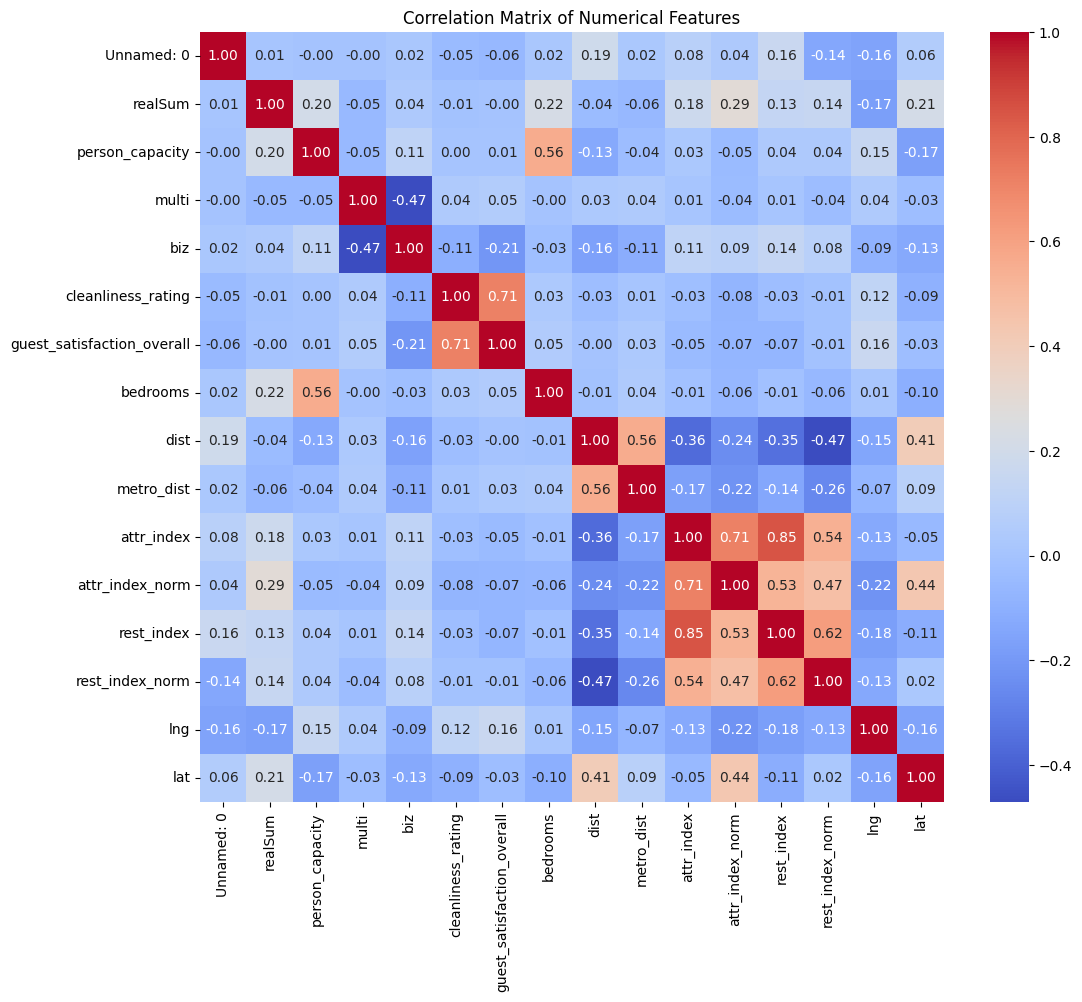

Highly Correlated Feature Pairs (above 0.8):
rest_index  attr_index    0.850229
attr_index  rest_index    0.850229
dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate numeric columns from the dataset
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Optional: Identify highly correlated pairs (above a threshold, e.g., 0.8)
high_correlation = correlation_matrix.unstack().sort_values(ascending=False)
high_correlation_pairs = high_correlation[(high_correlation > 0.8) & (high_correlation < 1)]
print("Highly Correlated Feature Pairs (above 0.8):")
print(high_correlation_pairs)



<Axes: xlabel='guest_satisfaction_overall', ylabel='cleanliness_rating'>

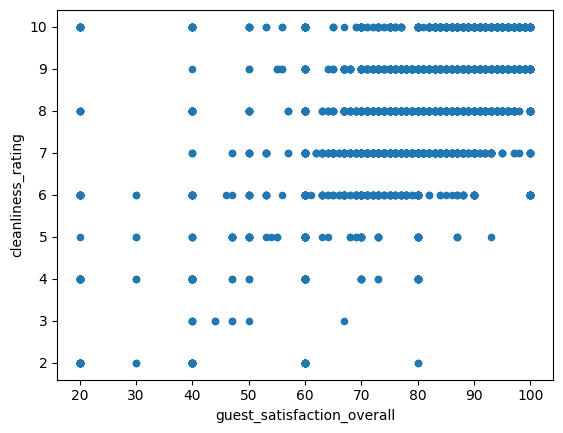

In [ ]:
df.plot(kind='scatter', x='guest_satisfaction_overall',y='cleanliness_rating')

In [ ]:
df.drop(columns=['attr_index'], inplace=True)


In [ ]:
# Get column names as a list
column_names = df.columns.tolist()
print(column_names)


['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private', 'person_capacity', 'host_is_superhost', 'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat', 'Country', 'Day_Type']


In [ ]:
df.drop(columns=['lat', 'lng'], inplace=True)


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

# One Hot Encoding

In [ ]:
df.columns

Index(['realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index_norm', 'rest_index', 'rest_index_norm',
       'Country', 'Day_Type'],
      dtype='object')

Applied One Hot encoding on Country and room type, which created 12 more columns and removed the main ones.

In [ ]:
import pandas as pd

# Assume `df` is your DataFrame
# Apply one-hot encoding on 'room_type' and 'Country'
df = pd.get_dummies(df, columns=['room_type', 'Country','Day_Type'], drop_first=False)
#df = pd.get_dummies(df, columns=['Day_Type'], drop_first=False)
# Display the updated DataFrame
print(df.head())


      realSum  room_shared  room_private  person_capacity  host_is_superhost  \
0  536.396682        False         False              5.0              False   
1  290.101594        False          True              2.0               True   
2  445.754497        False         False              4.0              False   
3  211.343089        False          True              2.0              False   
4  266.334234        False         False              2.0               True   

   multi  biz  cleanliness_rating  guest_satisfaction_overall  bedrooms  ...  \
0      0    1                 9.0                        89.0         1  ...   
1      0    0                10.0                        97.0         1  ...   
2      0    1                10.0                       100.0         1  ...   
3      0    0                10.0                        94.0         1  ...   
4      0    0                 9.0                        88.0         1  ...   

   Country_barcelona  Country_berlin  

In [ ]:
# Get column names as a list
column_names = df.columns.tolist()
print(column_names)


['realSum', 'room_shared', 'room_private', 'person_capacity', 'host_is_superhost', 'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room', 'Country_amsterdam', 'Country_athens', 'Country_barcelona', 'Country_berlin', 'Country_budapest', 'Country_lisbon', 'Country_london', 'Country_paris', 'Country_rome', 'Country_vienna', 'Day_Type_Weekday', 'Day_Type_Weekend']


In [ ]:
df


realSum  room_shared  room_private  person_capacity  \
0      536.396682        False         False              5.0   
1      290.101594        False          True              2.0   
2      445.754497        False         False              4.0   
3      211.343089        False          True              2.0   
4      266.334234        False         False              2.0   
...           ...          ...           ...              ...   
51702  231.615248        False         False              4.0   
51703  223.692795        False         False              2.0   
51704  567.853481        False         False              6.0   
51705  200.391462        False         False              2.0   
51706  301.286234        False         False              2.0   

       host_is_superhost  multi  biz  cleanliness_rating  \
0                  False      0    1                 9.0   
1                   True      0    0                10.0   
2                  False      0    1                10.0   
3                  False      0    0                10.0   
4                   True      0    0                 9.0   
...                  ...    ...  ...                 ...   
51702              False      0    0                10.0   
51703              False      1    0                 9.0   
51704               True      0    0                10.0   
51705               True      0    0                 9.0   
51706              False      0    0                10.0   

       guest_satisfaction_overall  bedrooms  ...  Country_barcelona  \
0                            89.0         1  ...              False   
1                            97.0         1  ...              False   
2                           100.0         1  ...              False   
3                            94.0         1  ...              False   
4                            88.0         1  ...              False   
...                           ...       ...  ...                ...   
51702                        98.0         1  ...              False   
51703                        89.0         1  ...              False   
51704                        96.0         3  ...              False   
51705                        93.0         1  ...              False   
51706                        92.0         1  ...              False   

       Country_berlin  Country_budapest  Country_lisbon  Country_london  \
0               False             False           False           False   
1               False             False           False           False   
2               False             False           False           False   
3               False             False           False           False   
4               False             False           False           False   
...               ...               ...             ...             ...   
51702           False             False           False           False   
51703           False             False           False           False   
51704           False             False           False           False   
51705           False             False           False           False   
51706           False             False           False           False   

       Country_paris  Country_rome  Country_vienna  Day_Type_Weekday  \
0               True         False           False             False   
1               True         False           False             False   
2               True         False           False             False   
3               True         False           False             False   
4               True         False           False             False   
...              ...           ...             ...               ...   
51702           True         False           False              True   
51703           True         False           False              True   
51704           True         False           False              True   
51705           True         False

In [ ]:
df.sample(10)

realSum  room_shared  room_private  person_capacity  \
48858  290.567620        False         False              2.0   
28597  117.829676        False          True              2.0   
13605  219.063428        False         False              3.0   
11958  138.405069        False          True              2.0   
13000  133.729222        False         False              3.0   
49111  301.286234        False         False              2.0   
32762  236.364061        False         False              5.0   
41757  133.242468        False         False              2.0   
34611  161.784303        False         False              2.0   
23821  112.570356        False          True              2.0   

       host_is_superhost  multi  biz  cleanliness_rating  \
48858              False      0    1                10.0   
28597              False      0    1                 9.0   
13605               True      1    0                 9.0   
11958              False      0    0                10.0   
13000              False      0    0                 9.0   
49111               True      1    0                10.0   
32762              False      0    1                 9.0   
41757              False      0    0                10.0   
34611              False      0    1                 9.0   
23821              False      1    0                 5.0   

       guest_satisfaction_overall  bedrooms  ...  Country_barcelona  \
48858                        87.0         0  ...              False   
28597                        91.0         1  ...              False   
13605                        95.0         1  ...              False   
11958                       100.0         1  ...              False   
13000                        94.0         1  ...              False   
49111                        98.0         1  ...              False   
32762                        90.0         2  ...              False   
41757                       100.0         1  ...              False   
34611                        93.0         1  ...              False   
23821                        47.0         1  ...              False   

       Country_berlin  Country_budapest  Country_lisbon  Country_london  \
48858           False             False           False           False   
28597           False             False           False            True   
13605           False             False           False           False   
11958           False             False           False           False   
13000           False             False           False           False   
49111           False             False           False           False   
32762           False             False           False           False   
41757           False              True           False           False   
34611           False             False           False           False   
23821           False             False            True           False   

       Country_paris  Country_rome  Country_vienna  Day_Type_Weekday  \
48858           True         False           False              True   
28597          False         False           False             False   
13605          False          True           False              True   
11958          False          True           False              True   
13000          False          True           False              True   
49111           True         False           False              True   
32762          False          True           False             False   
41757          False         False           False              True   
34611          False          True           False             False   
23821          False         False           False              True   

       Day_Type_Weekend  
48858             False  
28597              True  
13605             False  
11958             False  
13000             False  
49111             False  
32762              True  
41757             False 

 4.2&nbsp; Preprocessing

# Feature Scaling


In [ ]:
from sklearn.preprocessing import StandardScaler
features = [ 'room_shared', 'room_private', 'person_capacity', 'host_is_superhost', 'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'attr_index_norm', 'rest_index', 'rest_index_norm']
sc = StandardScaler()
df[features] = sc.fit_transform(df[features])

In [ ]:
df.columns

Index(['realSum', 'room_shared', 'room_private', 'person_capacity',
       'host_is_superhost', 'multi', 'biz', 'cleanliness_rating',
       'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist',
       'attr_index_norm', 'rest_index', 'rest_index_norm',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'Country_amsterdam', 'Country_athens',
       'Country_barcelona', 'Country_berlin', 'Country_budapest',
       'Country_lisbon', 'Country_london', 'Country_paris', 'Country_rome',
       'Country_vienna', 'Day_Type_Weekday', 'Day_Type_Weekend'],
      dtype='object')

In [ ]:
df

realSum  room_shared  room_private  person_capacity  \
0      536.396682        False         False              5.0   
1      290.101594        False          True              2.0   
2      445.754497        False         False              4.0   
3      211.343089        False          True              2.0   
4      266.334234        False         False              2.0   
...           ...          ...           ...              ...   
51702  231.615248        False         False              4.0   
51703  223.692795        False         False              2.0   
51704  567.853481        False         False              6.0   
51705  200.391462        False         False              2.0   
51706  301.286234        False         False              2.0   

       host_is_superhost  multi  biz  cleanliness_rating  \
0                  False      0    1                 9.0   
1                   True      0    0                10.0   
2                  False      0    1                10.0   
3                  False      0    0                10.0   
4                   True      0    0                 9.0   
...                  ...    ...  ...                 ...   
51702              False      0    0                10.0   
51703              False      1    0                 9.0   
51704               True      0    0                10.0   
51705               True      0    0                 9.0   
51706              False      0    0                10.0   

       guest_satisfaction_overall  bedrooms  ...  Country_barcelona  \
0                            89.0         1  ...              False   
1                            97.0         1  ...              False   
2                           100.0         1  ...              False   
3                            94.0         1  ...              False   
4                            88.0         1  ...              False   
...                           ...       ...  ...                ...   
51702                        98.0         1  ...              False   
51703                        89.0         1  ...              False   
51704                        96.0         3  ...              False   
51705                        93.0         1  ...              False   
51706                        92.0         1  ...              False   

       Country_berlin  Country_budapest  Country_lisbon  Country_london  \
0               False             False           False           False   
1               False             False           False           False   
2               False             False           False           False   
3               False             False           False           False   
4               False             False           False           False   
...               ...               ...             ...             ...   
51702           False             False           False           False   
51703           False             False           False           False   
51704           False             False           False           False   
51705           False             False           False           False   
51706           False             False           False           False   

       Country_paris  Country_rome  Country_vienna  Day_Type_Weekday  \
0               True         False           False             False   
1               True         False           False             False   
2               True         False           False             False   
3               True         False           False             False   
4               True         False           False             False   
...              ...           ...             ...               ...   
51702           True         False           False              True   
51703           True         False           False              True   
51704           True         False           False              True   
51705           True         False

In [ ]:
from sklearn.preprocessing import StandardScaler
feat_to_scale = ['person_capacity'
      , 'cleanliness_rating',
       'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist',
       'attr_index_norm', 'rest_index', 'rest_index_norm']
feat_not_to_scale = ['room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'Country_amsterdam', 'Country_athens',
       'Country_barcelona', 'Country_berlin', 'Country_budapest',
       'Country_lisbon', 'Country_london', 'Country_paris', 'Country_rome',
       'Country_vienna', 'Day_Type_Weekday', 'Day_Type_Weekend', 'multi', 'biz']

scaler = StandardScaler()
scaled_feat = pd.DataFrame(scaler.fit_transform(df[feat_to_scale]),columns=feat_to_scale)
df_final = pd.concat([scaled_feat.reset_index(drop=True),df[feat_not_to_scale].reset_index(drop=True)],axis=1)
df_final.head()

person_capacity  cleanliness_rating  guest_satisfaction_overall  bedrooms  \
0         1.415705           -0.409091                   -0.405596 -0.253043   
1        -0.894595            0.638184                    0.488714 -0.253043   
2         0.645605            0.638184                    0.824081 -0.253043   
3        -0.894595            0.638184                    0.153348 -0.253043   
4        -0.894595           -0.409091                   -0.517384 -0.253043   

       dist  metro_dist  attr_index_norm  rest_index  rest_index_norm  \
0 -0.768694   -0.546837         0.568701    0.811145         1.390940   
1 -1.040808   -0.568556         1.201813    1.188560         1.877867   
2 -0.928366   -0.451271         0.776496    0.889786         1.492399   
3  0.046384   -0.520737         0.835321    0.554310         1.059581   
4 -0.747293   -0.730160         3.655803    1.448452         2.213171   

   room_type_Entire home/apt  ...  Country_budapest  Country_lisbon  \
0                       True  ...             False           False   
1                      False  ...             False           False   
2                       True  ...             False           False   
3                      False  ...             False           False   
4                       True  ...             False           False   

   Country_london  Country_paris  Country_rome  Country_vienna  \
0           False           True         False           False   
1           False           True         False           False   
2           False           True         False           False   
3           False           True         False           False   
4           False           True         False           False   

   Day_Type_Weekday  Day_Type_Weekend  multi  biz  
0             False              True      0    1  
1             False              True      0    0  
2             False              True      0    1  
3             False              True      0    0  
4             False              True      0    0  

[5 rows x 26 columns]

In [ ]:
df

realSum  room_shared  room_private  person_capacity  \
0      536.396682        False         False              5.0   
1      290.101594        False          True              2.0   
2      445.754497        False         False              4.0   
3      211.343089        False          True              2.0   
4      266.334234        False         False              2.0   
...           ...          ...           ...              ...   
51702  231.615248        False         False              4.0   
51703  223.692795        False         False              2.0   
51704  567.853481        False         False              6.0   
51705  200.391462        False         False              2.0   
51706  301.286234        False         False              2.0   

       host_is_superhost  multi  biz  cleanliness_rating  \
0                  False      0    1                 9.0   
1                   True      0    0                10.0   
2                  False      0    1                10.0   
3                  False      0    0                10.0   
4                   True      0    0                 9.0   
...                  ...    ...  ...                 ...   
51702              False      0    0                10.0   
51703              False      1    0                 9.0   
51704               True      0    0                10.0   
51705               True      0    0                 9.0   
51706              False      0    0                10.0   

       guest_satisfaction_overall  bedrooms  ...  Country_barcelona  \
0                            89.0         1  ...              False   
1                            97.0         1  ...              False   
2                           100.0         1  ...              False   
3                            94.0         1  ...              False   
4                            88.0         1  ...              False   
...                           ...       ...  ...                ...   
51702                        98.0         1  ...              False   
51703                        89.0         1  ...              False   
51704                        96.0         3  ...              False   
51705                        93.0         1  ...              False   
51706                        92.0         1  ...              False   

       Country_berlin  Country_budapest  Country_lisbon  Country_london  \
0               False             False           False           False   
1               False             False           False           False   
2               False             False           False           False   
3               False             False           False           False   
4               False             False           False           False   
...               ...               ...             ...             ...   
51702           False             False           False           False   
51703           False             False           False           False   
51704           False             False           False           False   
51705           False             False           False           False   
51706           False             False           False           False   

       Country_paris  Country_rome  Country_vienna  Day_Type_Weekday  \
0               True         False           False             False   
1               True         False           False             False   
2               True         False           False             False   
3               True         False           False             False   
4               True         False           False             False   
...              ...           ...             ...               ...   
51702           True         False           False              True   
51703           True         False           False              True   
51704           True         False           False              True   
51705           True         False

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
import pandas as pd

# Automatically detect feature groups
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.difference(['realSum']).tolist()
binary_features = df.select_dtypes(include=['bool']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Combine all features except the target
all_features = numeric_features + binary_features + categorical_features

# Create ColumnTransformer for scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),  # Scale numeric features
        ('binary', 'passthrough', binary_features),  # Leave binary features as is
        ('categorical', 'passthrough', categorical_features)  # Leave categorical features as is
    ]
)

# Apply transformations to features only (excluding realSum)
X_transformed = preprocessor.fit_transform(df[all_features])

# Convert back to DataFrame and add realSum as the first column
df_transformed = pd.DataFrame(
    X_transformed,
    columns=numeric_features + binary_features + categorical_features
)
df_transformed.insert(0, 'realSum', df['realSum'])  # Add realSum back as the first column

# Display the dynamically created dataset
df_transformed


realSum  attr_index_norm  bedrooms  biz  cleanliness_rating  \
0      536.396682         0.182442       0.1  1.0               0.875   
1      290.101594         0.245118       0.1  0.0               1.000   
2      445.754497         0.203013       0.1  1.0               1.000   
3      211.343089         0.208837       0.1  0.0               1.000   
4      266.334234         0.488053       0.1  0.0               0.875   
...           ...              ...       ...  ...                 ...   
51702  231.615248         0.081790       0.1  0.0               1.000   
51703  223.692795         0.075486       0.1  0.0               0.875   
51704  567.853481         0.078220       0.3  0.0               1.000   
51705  200.391462         0.106200       0.1  0.0               0.875   
51706  301.286234         0.089234       0.1  0.0               1.000   

           dist  guest_satisfaction_overall  metro_dist  multi  \
0      0.052876                      0.8625    0.014718    0.0   
1      0.027099                      0.9625    0.013412    0.0   
2      0.037751                      1.0000    0.020464    0.0   
3      0.130089                      0.9250    0.016287    0.0   
4      0.054904                      0.8500    0.003696    0.0   
...         ...                         ...         ...    ...   
51702  0.140237                      0.9750    0.010682    0.0   
51703  0.165819                      0.8625    0.017569    1.0   
51704  0.170050                      0.9500    0.021185    0.0   
51705  0.113819                      0.9125    0.016704    0.0   
51706  0.136713                      0.9000    0.035469    0.0   

       person_capacity  ...  Country_barcelona  Country_berlin  \
0                 0.75  ...                0.0             0.0   
1                 0.00  ...                0.0             0.0   
2                 0.50  ...                0.0             0.0   
3                 0.00  ...                0.0             0.0   
4                 0.00  ...                0.0             0.0   
...                ...  ...                ...             ...   
51702             0.50  ...                0.0             0.0   
51703             0.00  ...                0.0             0.0   
51704             1.00  ...                0.0             0.0   
51705             0.00  ...                0.0             0.0   
51706             0.00  ...                0.0             0.0   

       Country_budapest  Country_lisbon  Country_london  Country_paris  \
0                   0.0             0.0             0.0            1.0   
1                   0.0             0.0             0.0            1.0   
2                   0.0             0.0             0.0            1.0   
3                   0.0             0.0             0.0            1.0   
4                   0.0             0.0             0.0            1.0   
...                 ...             ...             ...            ...   
51702               0.0             0.0             0.0            1.0   
51703               0.0             0.0             0.0            1.0   
51704               0.0             0.0             0.0            1.0   
51705               0.0             0.0             0.0            1.0   
51706               0.0             0.0             0.0            1.0   

       Country_rome  Country_vienna  Day_Type_Weekday  Day_Type_Weekend  
0               0.0             0.0               0.0               1.0  
1               0.0             0.0               0.0               1.0  
2               0.0             0.0               0.0               1.0  
3               0.0             0.0               0.0               1.0  
4               0.0             0.0               0.0               1.0  
...             ...             ...               ...               ...  
51702           0.0             0.0               1.0               0.0  
51703           0.0             0.0               1.0             

In [ ]:
# Get column names as a list
column_names = df_transformed.columns.tolist()
print(column_names)


['realSum', 'attr_index_norm', 'bedrooms', 'biz', 'cleanliness_rating', 'dist', 'guest_satisfaction_overall', 'metro_dist', 'multi', 'person_capacity', 'rest_index', 'rest_index_norm', 'room_shared', 'room_private', 'host_is_superhost', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room', 'Country_amsterdam', 'Country_athens', 'Country_barcelona', 'Country_berlin', 'Country_budapest', 'Country_lisbon', 'Country_london', 'Country_paris', 'Country_rome', 'Country_vienna', 'Day_Type_Weekday', 'Day_Type_Weekend']


# Data Splitting

In [ ]:
df

realSum  room_shared  room_private  person_capacity  \
0      536.396682        False         False              5.0   
1      290.101594        False          True              2.0   
2      445.754497        False         False              4.0   
3      211.343089        False          True              2.0   
4      266.334234        False         False              2.0   
...           ...          ...           ...              ...   
51702  231.615248        False         False              4.0   
51703  223.692795        False         False              2.0   
51704  567.853481        False         False              6.0   
51705  200.391462        False         False              2.0   
51706  301.286234        False         False              2.0   

       host_is_superhost  multi  biz  cleanliness_rating  \
0                  False      0    1                 9.0   
1                   True      0    0                10.0   
2                  False      0    1                10.0   
3                  False      0    0                10.0   
4                   True      0    0                 9.0   
...                  ...    ...  ...                 ...   
51702              False      0    0                10.0   
51703              False      1    0                 9.0   
51704               True      0    0                10.0   
51705               True      0    0                 9.0   
51706              False      0    0                10.0   

       guest_satisfaction_overall  bedrooms  ...  Country_barcelona  \
0                            89.0         1  ...              False   
1                            97.0         1  ...              False   
2                           100.0         1  ...              False   
3                            94.0         1  ...              False   
4                            88.0         1  ...              False   
...                           ...       ...  ...                ...   
51702                        98.0         1  ...              False   
51703                        89.0         1  ...              False   
51704                        96.0         3  ...              False   
51705                        93.0         1  ...              False   
51706                        92.0         1  ...              False   

       Country_berlin  Country_budapest  Country_lisbon  Country_london  \
0               False             False           False           False   
1               False             False           False           False   
2               False             False           False           False   
3               False             False           False           False   
4               False             False           False           False   
...               ...               ...             ...             ...   
51702           False             False           False           False   
51703           False             False           False           False   
51704           False             False           False           False   
51705           False             False           False           False   
51706           False             False           False           False   

       Country_paris  Country_rome  Country_vienna  Day_Type_Weekday  \
0               True         False           False             False   
1               True         False           False             False   
2               True         False           False             False   
3               True         False           False             False   
4               True         False           False             False   
...              ...           ...             ...               ...   
51702           True         False           False              True   
51703           True         False           False              True   
51704           True         False           False              True   
51705           True         False

In [ ]:
# Ensure to use the transformed dataset
X = df_final.iloc[:, 1:].values  # All features except 'realSum'
y = df_final.iloc[:, 0].values  # 'realSum' as the target variable


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Display split information
print(f"Training Features (X_train): {X_train.shape}")
print(f"Testing Features (X_test): {X_test.shape}")
print(f"Training Target (y_train): {y_train.shape}")
print(f"Testing Target (y_test): {y_test.shape}")


Training Features (X_train): (41365, 25)
Testing Features (X_test): (10342, 25)
Training Target (y_train): (41365,)
Testing Target (y_test): (10342,)


In [ ]:
y

array([536.39668189, 290.10159381, 445.75449716, ..., 567.85348122,
       200.39146239, 301.28623357])

In [ ]:
df_transformed

realSum  attr_index_norm  bedrooms  biz  cleanliness_rating  \
0      536.396682         0.182442       0.1  1.0               0.875   
1      290.101594         0.245118       0.1  0.0               1.000   
2      445.754497         0.203013       0.1  1.0               1.000   
3      211.343089         0.208837       0.1  0.0               1.000   
4      266.334234         0.488053       0.1  0.0               0.875   
...           ...              ...       ...  ...                 ...   
51702  231.615248         0.081790       0.1  0.0               1.000   
51703  223.692795         0.075486       0.1  0.0               0.875   
51704  567.853481         0.078220       0.3  0.0               1.000   
51705  200.391462         0.106200       0.1  0.0               0.875   
51706  301.286234         0.089234       0.1  0.0               1.000   

           dist  guest_satisfaction_overall  metro_dist  multi  \
0      0.052876                      0.8625    0.014718    0.0   
1      0.027099                      0.9625    0.013412    0.0   
2      0.037751                      1.0000    0.020464    0.0   
3      0.130089                      0.9250    0.016287    0.0   
4      0.054904                      0.8500    0.003696    0.0   
...         ...                         ...         ...    ...   
51702  0.140237                      0.9750    0.010682    0.0   
51703  0.165819                      0.8625    0.017569    1.0   
51704  0.170050                      0.9500    0.021185    0.0   
51705  0.113819                      0.9125    0.016704    0.0   
51706  0.136713                      0.9000    0.035469    0.0   

       person_capacity  ...  Country_barcelona  Country_berlin  \
0                 0.75  ...                0.0             0.0   
1                 0.00  ...                0.0             0.0   
2                 0.50  ...                0.0             0.0   
3                 0.00  ...                0.0             0.0   
4                 0.00  ...                0.0             0.0   
...                ...  ...                ...             ...   
51702             0.50  ...                0.0             0.0   
51703             0.00  ...                0.0             0.0   
51704             1.00  ...                0.0             0.0   
51705             0.00  ...                0.0             0.0   
51706             0.00  ...                0.0             0.0   

       Country_budapest  Country_lisbon  Country_london  Country_paris  \
0                   0.0             0.0             0.0            1.0   
1                   0.0             0.0             0.0            1.0   
2                   0.0             0.0             0.0            1.0   
3                   0.0             0.0             0.0            1.0   
4                   0.0             0.0             0.0            1.0   
...                 ...             ...             ...            ...   
51702               0.0             0.0             0.0            1.0   
51703               0.0             0.0             0.0            1.0   
51704               0.0             0.0             0.0            1.0   
51705               0.0             0.0             0.0            1.0   
51706               0.0             0.0             0.0            1.0   

       Country_rome  Country_vienna  Day_Type_Weekday  Day_Type_Weekend  
0               0.0             0.0               0.0               1.0  
1               0.0             0.0               0.0               1.0  
2               0.0             0.0               0.0               1.0  
3               0.0             0.0               0.0               1.0  
4               0.0             0.0               0.0               1.0  
...             ...             ...               ...               ...  
51702           0.0             0.0               1.0               0.0  
51703           0.0             0.0               1.0             

# 5. PCA analysis

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_trainPCA = pca.fit_transform(X_train)
X_testPCA = pca.transform(X_test)

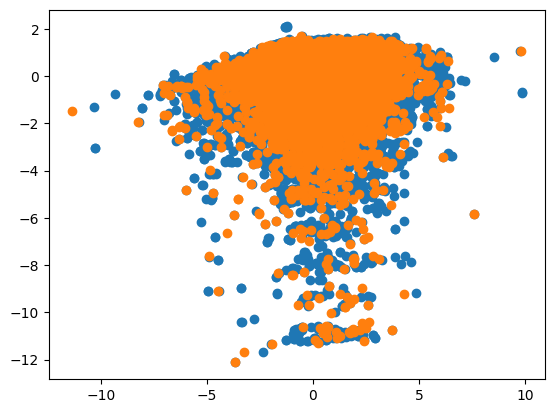

In [ ]:
plt.scatter(x=X_trainPCA[:,0],y=X_trainPCA[:,1])
plt.scatter(x=X_testPCA[:,0],y=X_testPCA[:,1])

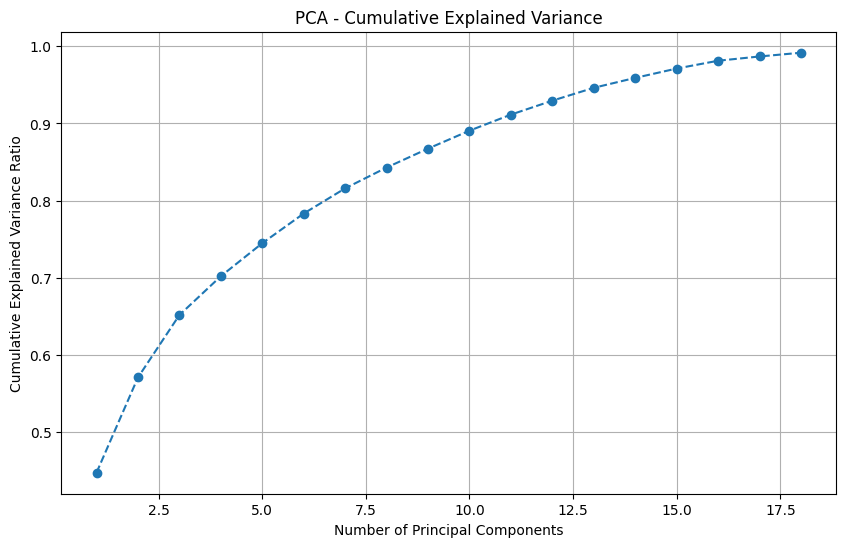

Number of components explaining 80% of variance: 7
Explained Variance Ratio of Selected Components: [0.44703967 0.12347939 0.08099536 0.05034545 0.04281879 0.0384705
 0.03265898]


In [ ]:
n_components = 2#NEW PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Exclude the target variable 'realSum' from the dataset for PCA
X_pca_input = df_transformed.iloc[:, 1:].values  # Exclude the first column 'realSum'

# Apply PCA
pca = PCA(n_components = 18)
X_pca = pca.fit_transform(X_pca_input)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA - Cumulative Explained Variance')
plt.grid()
plt.show()

# Determine the number of components to explain 80% of the variance
n_components = np.argmax(cumulative_variance_ratio >= 0.8) + 1
print(f"Number of components explaining 80% of variance: {n_components}")

# Apply PCA with the optimal number of components
pca_optimal = PCA(n_components=n_components)
X_pca_optimal = pca_optimal.fit_transform(X_pca_input)

# Print the variance explained by each of the selected components
print(f"Explained Variance Ratio of Selected Components: {pca_optimal.explained_variance_ratio_}")


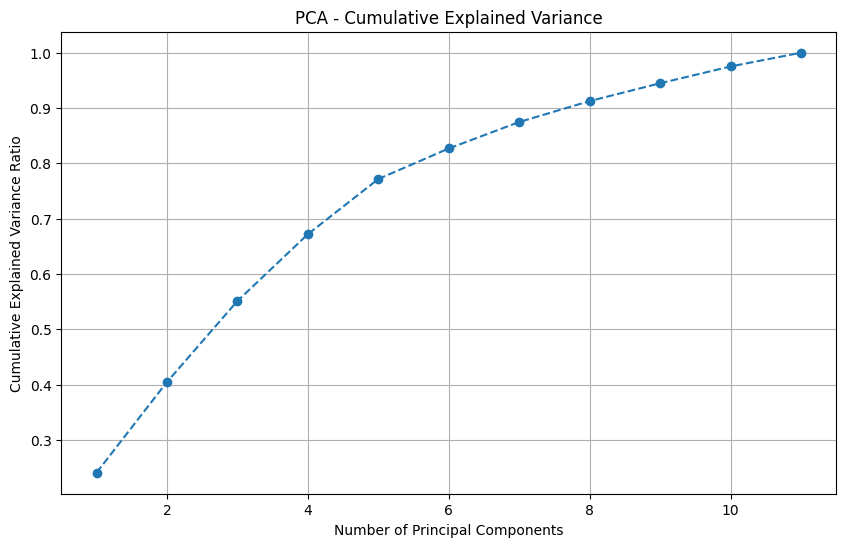

Number of components explaining 80% of variance: 6
Explained Variance Ratio of Selected Components: [0.24096279 0.1639003  0.14643077 0.1207391  0.09973166 0.05517718]


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Standardize the numeric features
scaler = StandardScaler()
X_numeric = df[numeric_features]
X_scaled = scaler.fit_transform(X_numeric)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA - Cumulative Explained Variance')
plt.grid()
plt.show()

# Determine the number of components to explain 80% of the variance
n_components = np.argmax(cumulative_variance_ratio >= 0.8) + 1
print(f"Number of components explaining 80% of variance: {n_components}")

# Apply PCA with optimal number of components
pca_optimal = PCA(n_components=n_components)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

# Print the variance explained by each of the selected components
print(f"Explained Variance Ratio of Selected Components: {pca_optimal.explained_variance_ratio_}")


# Clustering

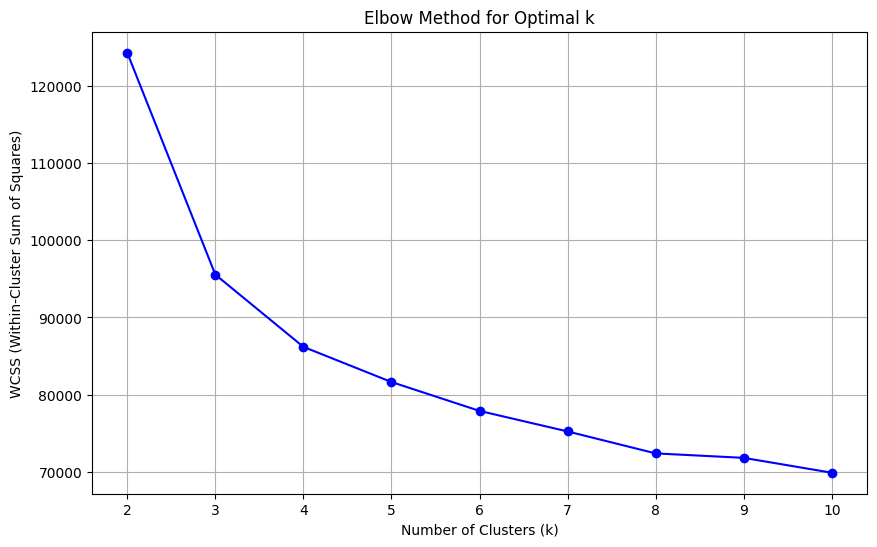

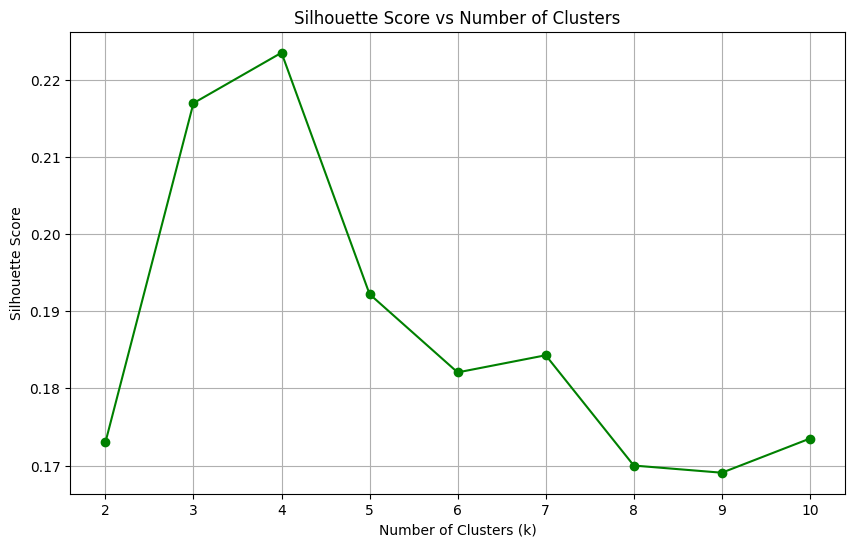

Optimal number of clusters: 4


NameError: name 'X_transformed_df' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
#new clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude realSum for clustering
X_clustering = df_transformed.drop(columns=['realSum']).values  # Use all features except realSum

# Determine the optimal number of clusters (Elbow Method and Silhouette Score)
wcss = []  # Within-cluster sum of squares
silhouette_scores = []
K = range(2, 11)  # Number of clusters to test

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_clustering)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_clustering, cluster_labels))

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid()
plt.show()

# Choose the optimal number of clusters (e.g., based on the Elbow Method or highest Silhouette Score)
optimal_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_k}")

# Apply K-Means with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
df_transformed['Cluster'] = kmeans_optimal.fit_predict(X_clustering)

# Visualize the clusters (use two numerical features or PCA components for simplicity)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_clustering[:, 0], y=X_clustering[:, 1], hue=df_transformed['Cluster'], palette='viridis', s=50)
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()


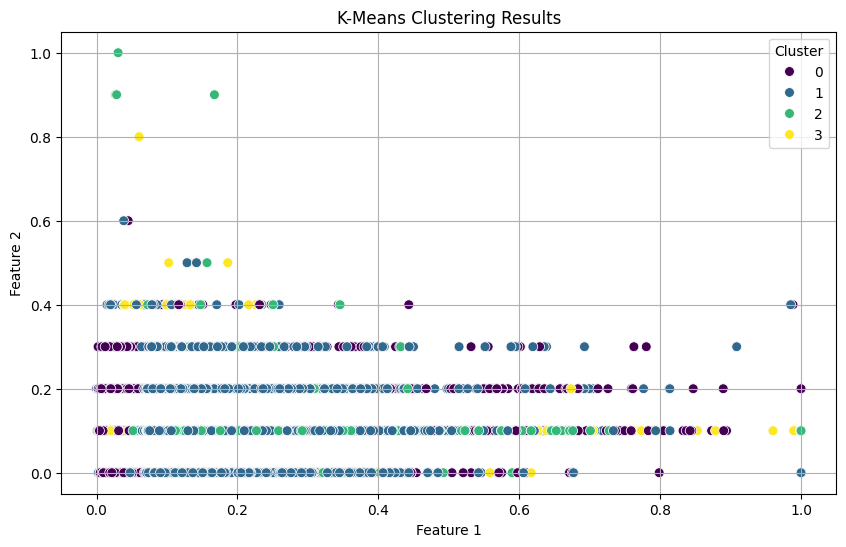

In [ ]:
# Visualize the clusters (use two numerical features or PCA components for simplicity)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_clustering[:, 0], y=X_clustering[:, 1], hue=df_transformed['Cluster'], palette='viridis', s=50)
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

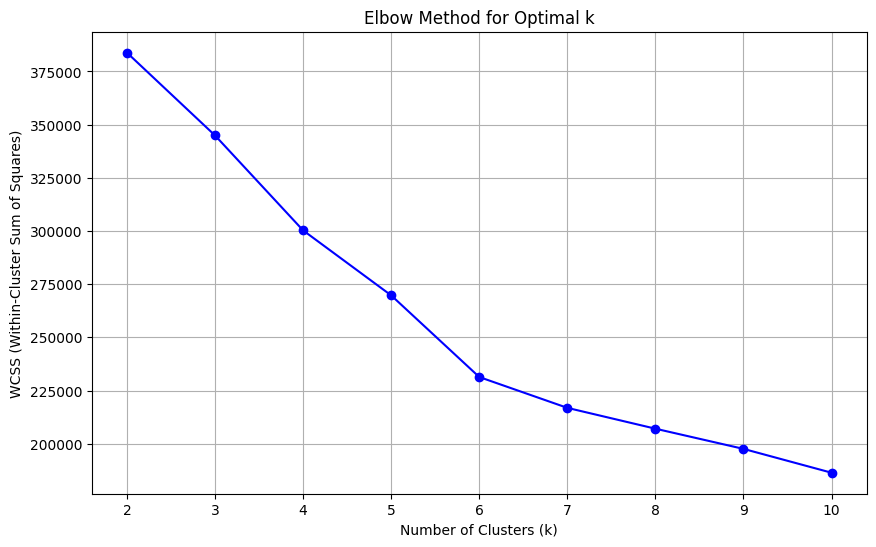

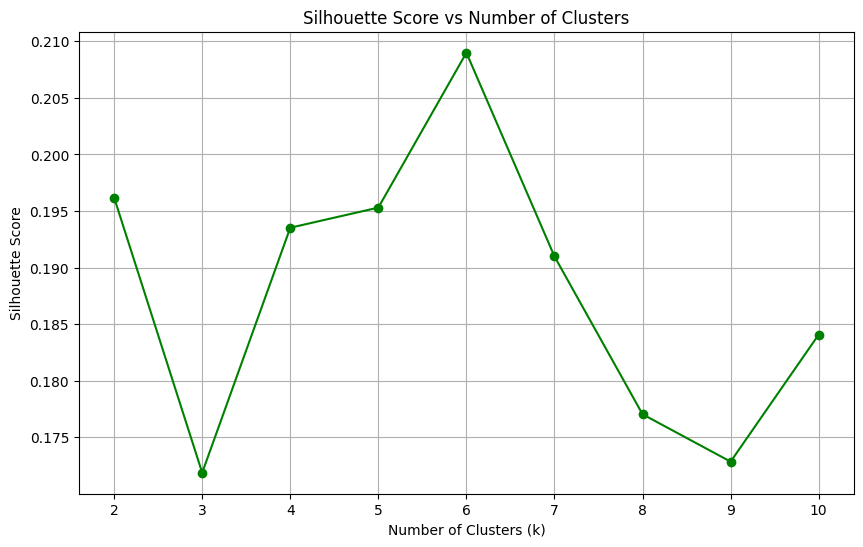

Optimal number of clusters: 6


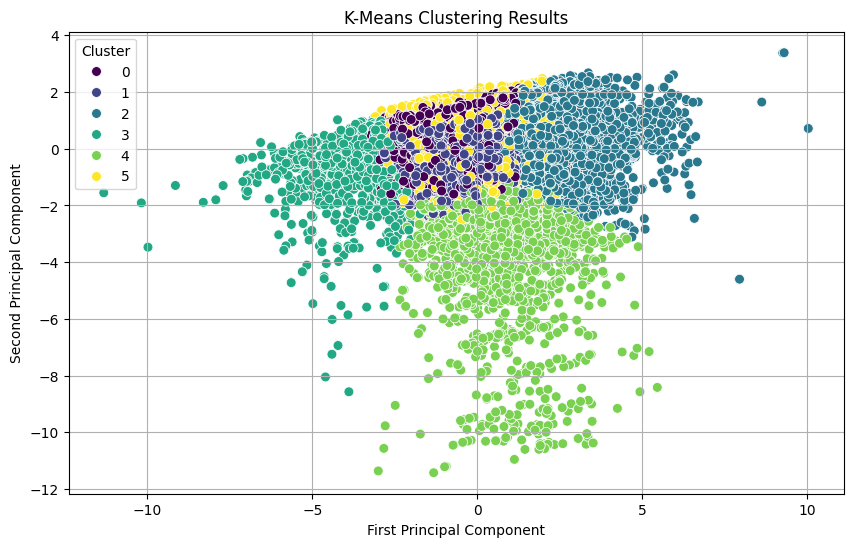

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for clustering (use PCA-transformed data or numeric features)
X_clustering = X_pca_optimal  # Use PCA-transformed data with 5 components
# Alternatively: X_clustering = scaler.fit_transform(df[numeric_features]) for raw numeric data

# Determine the optimal number of clusters (Elbow Method and Silhouette Score)
wcss = []  # Within-cluster sum of squares
silhouette_scores = []
K = range(2, 11)  # Number of clusters to test

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_clustering)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_clustering, cluster_labels))

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid()
plt.show()

# Choose the optimal number of clusters (e.g., based on the Elbow Method or highest Silhouette Score)
optimal_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_k}")

# Apply K-Means with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans_optimal.fit_predict(X_clustering)

# Visualize the clusters (use the first two principal components for simplicity)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_optimal[:, 0], y=X_pca_optimal[:, 1], hue=df['Cluster'], palette='viridis', s=50)
plt.title('K-Means Clustering Results')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(title='Cluster')
plt.grid()
plt.show()


# Model

In [ ]:
import pandas as pd


# Create the cluster summary table from the given data
cluster_summary_data = {
    'Cluster': [0, 1, 2, 3, 4],
    'realSum': [215.83, 339.22, 267.93, 376.17, 394.43],
    'person_capacity': [2.63, 3.95, 2.91, 2.93, 4.95],
    'multi': [0.31, 0.28, 0.22, 0.22, 0.26],
    'biz': [0.29, 0.38, 0.55, 0.16, 0.34],
    'cleanliness_rating': [9.64, 9.94, 7.34, 9.15, 9.57],
    'guest_satisfaction_overall': [94.96, 93.34, 93.52, 94.14, 94.25],
    'bedrooms': [0.96, 1.00, 0.89, 1.17, 1.17],
    'dist': [3.49, 1.68, 3.59, 8.86, 2.11],
    'metro_dist': [0.58, 0.42, 0.52, 3.54, 0.53],
    'attr_index_norm': [9.98, 10.32, 14.43, 6.63, 10.59],
    'rest_index': [417.46, 580.02, 216.78, 238.71, 495.93],
    'rest_index_norm': [15.12, 19.05, 18.71, 13.25, 18.52],
}

# Create a DataFrame
cluster_summary = pd.DataFrame(cluster_summary_data)

# Display the cluster summary
# Display the cluster summary DataFrame in a clean format
print(cluster_summary.to_string(index=False))



 Cluster  realSum  person_capacity  multi  biz  cleanliness_rating  guest_satisfaction_overall  bedrooms  dist  metro_dist  attr_index_norm  rest_index  rest_index_norm
       0   215.83             2.63   0.31 0.29                9.64                       94.96      0.96  3.49        0.58             9.98      417.46            15.12
       1   339.22             3.95   0.28 0.38                9.94                       93.34      1.00  1.68        0.42            10.32      580.02            19.05
       2   267.93             2.91   0.22 0.55                7.34                       93.52      0.89  3.59        0.52            14.43      216.78            18.71
       3   376.17             2.93   0.22 0.16                9.15                       94.14      1.17  8.86        3.54             6.63      238.71            13.25
       4   394.43             4.95   0.26 0.34                9.57                       94.25      1.17  2.11        0.53            10.59      495.93    

**Cluster Analysis:**

The clusters represent groups of listings with similar characteristics. For example:
  Cluster 0 has listings with relatively low prices and lower guest_satisfaction_overall scores.
  Cluster 4 has listings with higher prices (realSum ~394.43), higher guest satisfaction, and larger person_capacity.

**Interpretation of Differences:**

  Different clusters show meaningful variations in realSum, person_capacity, biz, and other features.

**For instance:**
  Cluster 0: Lower-priced listings with fewer bedrooms and lower satisfaction scores.
  Cluster 4: Higher-priced listings with more bedrooms, larger capacities, and higher satisfaction.



*   Cluster 0: Budget accommodations with lower satisfaction scores and cleanliness.
*   Cluster 4: Premium listings with higher prices, larger capacities, and better ratings.
*   Cluster 2 and 3: Mid-range listings with intermediate values for most features.
*  Cluster 1: Possibly listings with a unique combination of low realSum but decent guest satisfaction.




In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for clustering (use PCA-transformed data or numeric features)
#X_clustering = X_pca_optimal  # Use PCA-transformed data with 5 components
X_clustering = scaler.fit_transform(df[numeric_features]) #for raw numeric data

# Determine the optimal number of clusters (Elbow Method and Silhouette Score)
wcss = []  # Within-cluster sum of squares
silhouette_scores = []
K = range(2, 11)  # Number of clusters to test

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_clustering)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_clustering, cluster_labels))

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid()
plt.show()

# Choose the optimal number of clusters (e.g., based on the Elbow Method or highest Silhouette Score)
optimal_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_k}")

# Apply K-Means with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans_optimal.fit_predict(X_clustering)

# Visualize the clusters (use the first two principal components for simplicity)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_optimal[:, 0], y=X_pca_optimal[:, 1], hue=df['Cluster'], palette='viridis', s=50)
plt.title('K-Means Clustering Results')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(title='Cluster')
plt.grid()
plt.show()


NameError: name 'scaler' is not defined

In [ ]:
import pandas as pd


# Create the cluster summary table from the given data
cluster_summary_data = {
    'Cluster': [0, 1, 2, 3, 4],
    'realSum': [215.83, 339.22, 267.93, 376.17, 394.43],
    'person_capacity': [2.63, 3.95, 2.91, 2.93, 4.95],
    'multi': [0.31, 0.28, 0.22, 0.22, 0.26],
    'biz': [0.29, 0.38, 0.55, 0.16, 0.34],
    'cleanliness_rating': [9.64, 9.94, 7.34, 9.15, 9.57],
    'guest_satisfaction_overall': [94.96, 93.34, 93.52, 94.14, 94.25],
    'bedrooms': [0.96, 1.00, 0.89, 1.17, 1.17],
    'dist': [3.49, 1.68, 3.59, 8.86, 2.11],
    'metro_dist': [0.58, 0.42, 0.52, 3.54, 0.53],
    'attr_index_norm': [9.98, 10.32, 14.43, 6.63, 10.59],
    'rest_index': [417.46, 580.02, 216.78, 238.71, 495.93],
    'rest_index_norm': [15.12, 19.05, 18.71, 13.25, 18.52],
}

# Create a DataFrame
cluster_summary = pd.DataFrame(cluster_summary_data)

# Display the cluster summary
# Display the cluster summary DataFrame in a clean format
print(cluster_summary.to_string(index=False))


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample Data (from the previous cluster summary for illustrative purposes)
cluster_summary_data = {
    'Cluster': [0, 1, 2, 3, 4],
    'realSum': [215.83, 339.22, 267.93, 376.17, 394.43],
    'person_capacity': [2.63, 3.95, 2.91, 2.93, 4.95],
    'multi': [0.31, 0.28, 0.22, 0.22, 0.26],
    'biz': [0.29, 0.38, 0.55, 0.16, 0.34],
    'cleanliness_rating': [9.64, 9.94, 7.34, 9.15, 9.57],
    'guest_satisfaction_overall': [94.96, 93.34, 93.52, 94.14, 94.25],
    'bedrooms': [0.96, 1.00, 0.89, 1.17, 1.17],
    'dist': [3.49, 1.68, 3.59, 8.86, 2.11],
    'metro_dist': [0.58, 0.42, 0.52, 3.54, 0.53],
    'attr_index_norm': [9.98, 10.32, 14.43, 6.63, 10.59],
    'rest_index': [417.46, 580.02, 216.78, 238.71, 495.93],
    'rest_index_norm': [15.12, 19.05, 18.71, 13.25, 18.52],
}

# Create a DataFrame
cluster_summary = pd.DataFrame(cluster_summary_data)

# Visualize Clusters: Scatter plot of `realSum` vs `person_capacity`
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cluster_summary, x='person_capacity', y='realSum', hue='Cluster', palette='viridis', s=100)
plt.title('Cluster-wise Analysis: Price vs Person Capacity')
plt.xlabel('Person Capacity')
plt.ylabel('Price (realSum)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Visualize the cluster characteristics using heatmaps
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary.drop(columns='Cluster').set_index(cluster_summary['Cluster']),
            annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Cluster Summary Heatmap')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()

# Examine categorical features like `room_type` across clusters (dummy example)
# Replace this with actual categorical analysis data when available
# Example categorical data
categorical_distribution = {
    'Cluster': [0, 1, 2, 3, 4],
    'Entire home/apt': [50, 120, 90, 30, 100],
    'Private room': [30, 40, 60, 70, 50],
    'Shared room': [5, 10, 5, 20, 15],
}

categorical_df = pd.DataFrame(categorical_distribution).set_index('Cluster')
categorical_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Room Type Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Listings')
plt.legend(title='Room Type')
plt.show()

# Summarize Insights
# Display the cluster summary DataFrame in a clean format
print(cluster_summary.to_string(index=False))



In [ ]:
df

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are defined from previous steps
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=1.0)
}

# Placeholder for results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on both training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    metrics = {
        "Train RMSE": mean_squared_error(y_train, y_train_pred, squared=False),
        "Test RMSE": mean_squared_error(y_test, y_test_pred, squared=False),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Train R2": r2_score(y_train, y_train_pred),
        "Test R2": r2_score(y_test, y_test_pred)
    }

    # Store results
    results[model_name] = metrics

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results).T

# Display the results to the user


results_df
